In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting logging to print only error messages from sklearn
import logging
logging.basicConfig()
logging.getLogger("SKLEARNEX").setLevel(logging.ERROR)

# Import warnings module
import warnings
warnings.filterwarnings("ignore") # Ignore warnings

# Data Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, precision_recall_curve, auc

sns.set_theme(palette="tab10")


# Load data

In [4]:
df = pd.read_csv("D:\\MIS 451\\hotel_bookings.csv\\hotel_bookings.csv")

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,No Deposit,273.0,NaN,0,Transient-Party,-6.38,0,0,Check-Out,3/15/2017
1,City Hotel,0,4,2015,December,50,11,0,1,2,...,No Deposit,45.0,NaN,0,Transient,0.00,0,0,Check-Out,12/12/2015
2,City Hotel,0,15,2015,December,51,17,0,2,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,12/19/2015
3,Resort Hotel,1,5,2016,August,32,2,0,1,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Canceled,7/28/2016
4,Resort Hotel,0,1,2016,February,8,20,0,1,2,...,No Deposit,NaN,NaN,0,Transient,0.00,1,2,Check-Out,2/21/2016


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df['agent'] = df['agent'].astype(object)

# Exploratory Data Analysis

## Univariate

In [10]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,103050.0,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,333.0,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,9.0,Transient,Check-Out,10/21/2015
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,31961.0,89613,75166,1461


In [11]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [12]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['March' 'December' 'August' 'February' 'November' 'May' 'October'
 'September' 'April' 'July' 'June' 'January']
--------------------------------------------------
meal
['BB' 'SC' 'HB' 'FB' 'Undefined']
--------------------------------------------------
country
['GBR' 'PRT' 'BRA' 'AGO' 'ESP' 'BEL' nan 'CHN' 'ITA' 'DEU' 'CYP' 'FIN'
 'CN' 'FRA' 'AUT' 'IRL' 'QAT' 'CHE' 'USA' 'HUN' 'NLD' 'POL' 'TZA' 'ARG'
 'BOL' 'ISL' 'SWE' 'TUN' 'ARE' 'DNK' 'RUS' 'LUX' 'SVN' 'UKR' 'ISR' 'BLR'
 'MAR' 'MEX' 'SRB' 'CZE' 'MOZ' 'CMR' 'NOR' 'IND' 'ZAF' 'THA' 'TUR' 'LTU'
 'CUB' 'ZWE' 'COL' 'AUS' 'KOR' 'ROU' 'CRI' 'LKA' 'IRN' 'MYS' 'MLT' 'ALB'
 'DZA' 'CPV' 'EST' 'HRV' 'MDV' 'OMN' 'LVA' 'BGR' 'GRC' 'PRI' 'ECU' 'CYM'
 'IDN' 'CAF' 'NGA' 'UGA' 'MDG' 'CIV' 'CHL' 'BDI' 'VEN' 'NZL' 'JOR' 'ARM'
 'JAM' 'BIH' 'SGP' 'BHS' 'JPN' 'MUS' 'SYR' 'SVK' 'JEY' 'SUR' 'GIB' 'URY'
 'TWN' 'GTM' 'TGO' 'UZB' 'SEN' 'KAZ' 'PAK' 'GGY' 'M

**Target Variable**

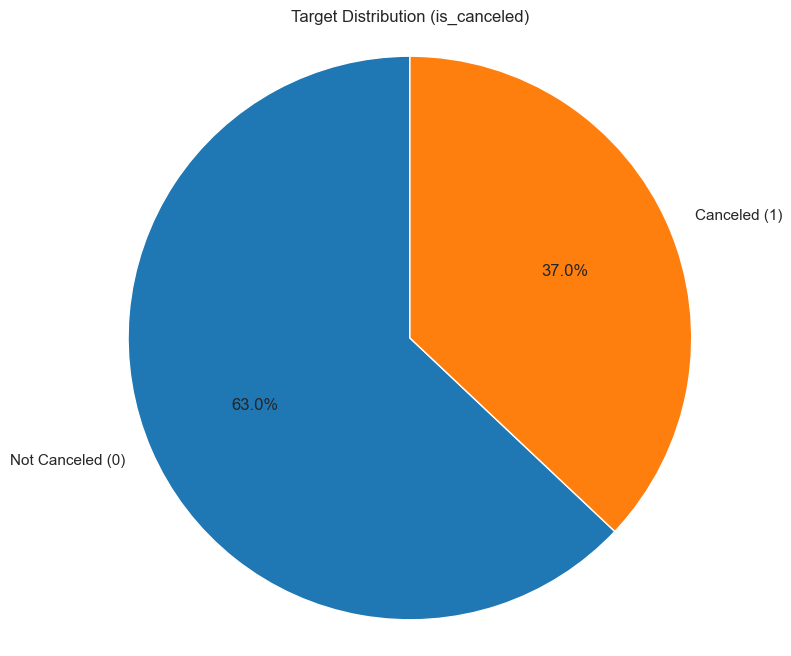

Percentage distribution of 'is_canceled':
is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64


In [14]:
canceled_counts = df['is_canceled'].value_counts(normalize=True)

plt.figure(figsize=(8, 8))
plt.pie(canceled_counts, labels=['Not Canceled (0)', 'Canceled (1)'], autopct='%1.1f%%', startangle=90)
plt.title("Target Distribution (is_canceled)")
plt.axis('equal')
plt.show()

print("Percentage distribution of 'is_canceled':")
print(canceled_counts)


The dataset shows a class imbalance where approximately 37% of bookings are canceled, while 63% are not.

**Numerical Variables**

In [17]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

numeric_cols = [col for col in numeric_cols if col != "is_canceled"]

In [18]:
# Continuous: Wide range of values
continuous_vars = ['lead_time', 'adr', 'days_in_waiting_list',
                   'stays_in_week_nights', 'stays_in_weekend_nights']

# Discrete: specific counts
discrete_vars = ['adults', 'children', 'babies', 'required_car_parking_spaces',
                 'total_of_special_requests', 'previous_cancellations', 'booking_changes']

Continuous Variables

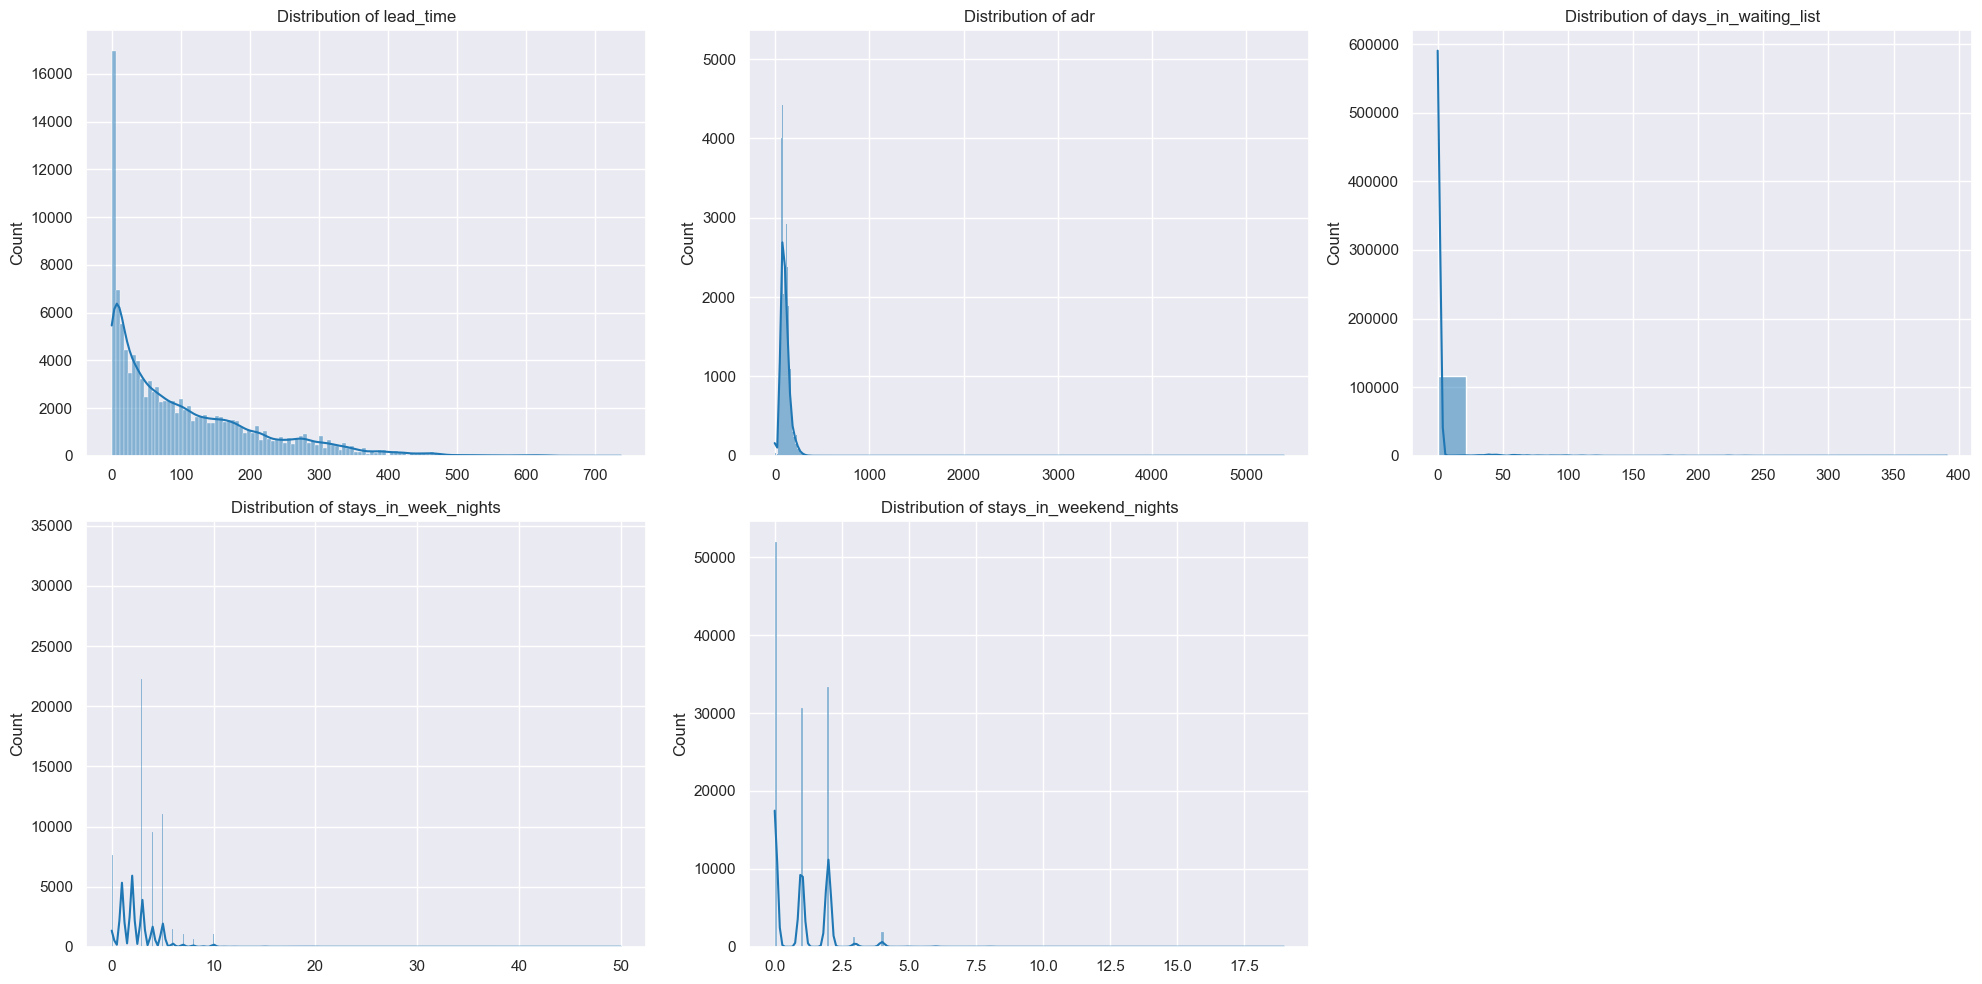

In [20]:
num_cols_to_plot = len(continuous_vars)
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(continuous_vars):
    if i < len(axes):
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xlabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

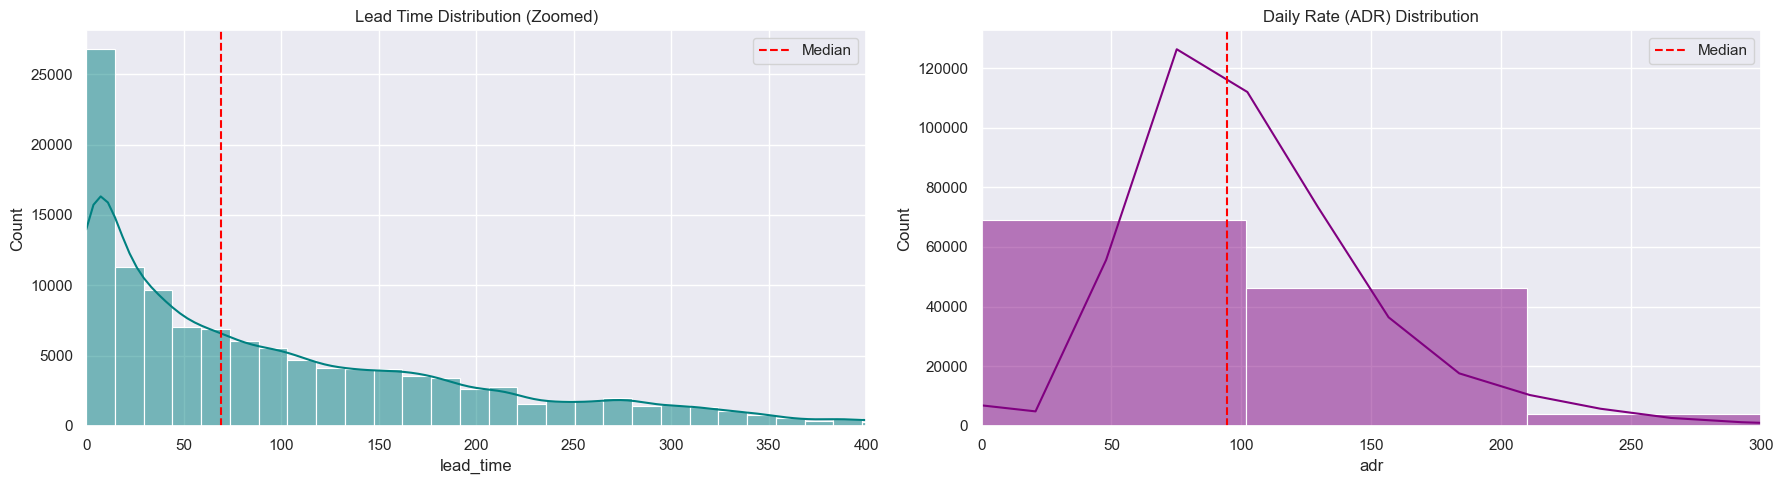

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))


# Lead Time Zoomed In
sns.histplot(df['lead_time'], bins=50, kde=True, ax=axes[0], color='teal')
axes[0].set_xlim(0, 400) # Hide extreme outliers
axes[0].axvline(df['lead_time'].median(), color='red', linestyle='--', label='Median')
axes[0].set_title('Lead Time Distribution (Zoomed)')
axes[0].legend()

# ADR
sns.histplot(df['adr'], bins=50, kde=True, ax=axes[1], color='purple')
axes[1].set_xlim(0, 300) # Focus on main price range
axes[1].axvline(df['adr'].median(), color='red', linestyle='--', label='Median')
axes[1].set_title('Daily Rate (ADR) Distribution')
axes[1].legend()

plt.tight_layout()
plt.show()

1. Lead Time

  - Distribution: The distribution is heavily right-skewed. Most bookings happen within 0-50 days.

  - Median Line: The median lead time is around 50 days, meaning half of all customers book less than two months in advance.

2. Average Daily Rate (adr)

  - Distribution: Prices are roughly normally distributed, centered around €100, with a slight right skew.

  - The majority of room rates fall between €70 and €130.

Discrete variables

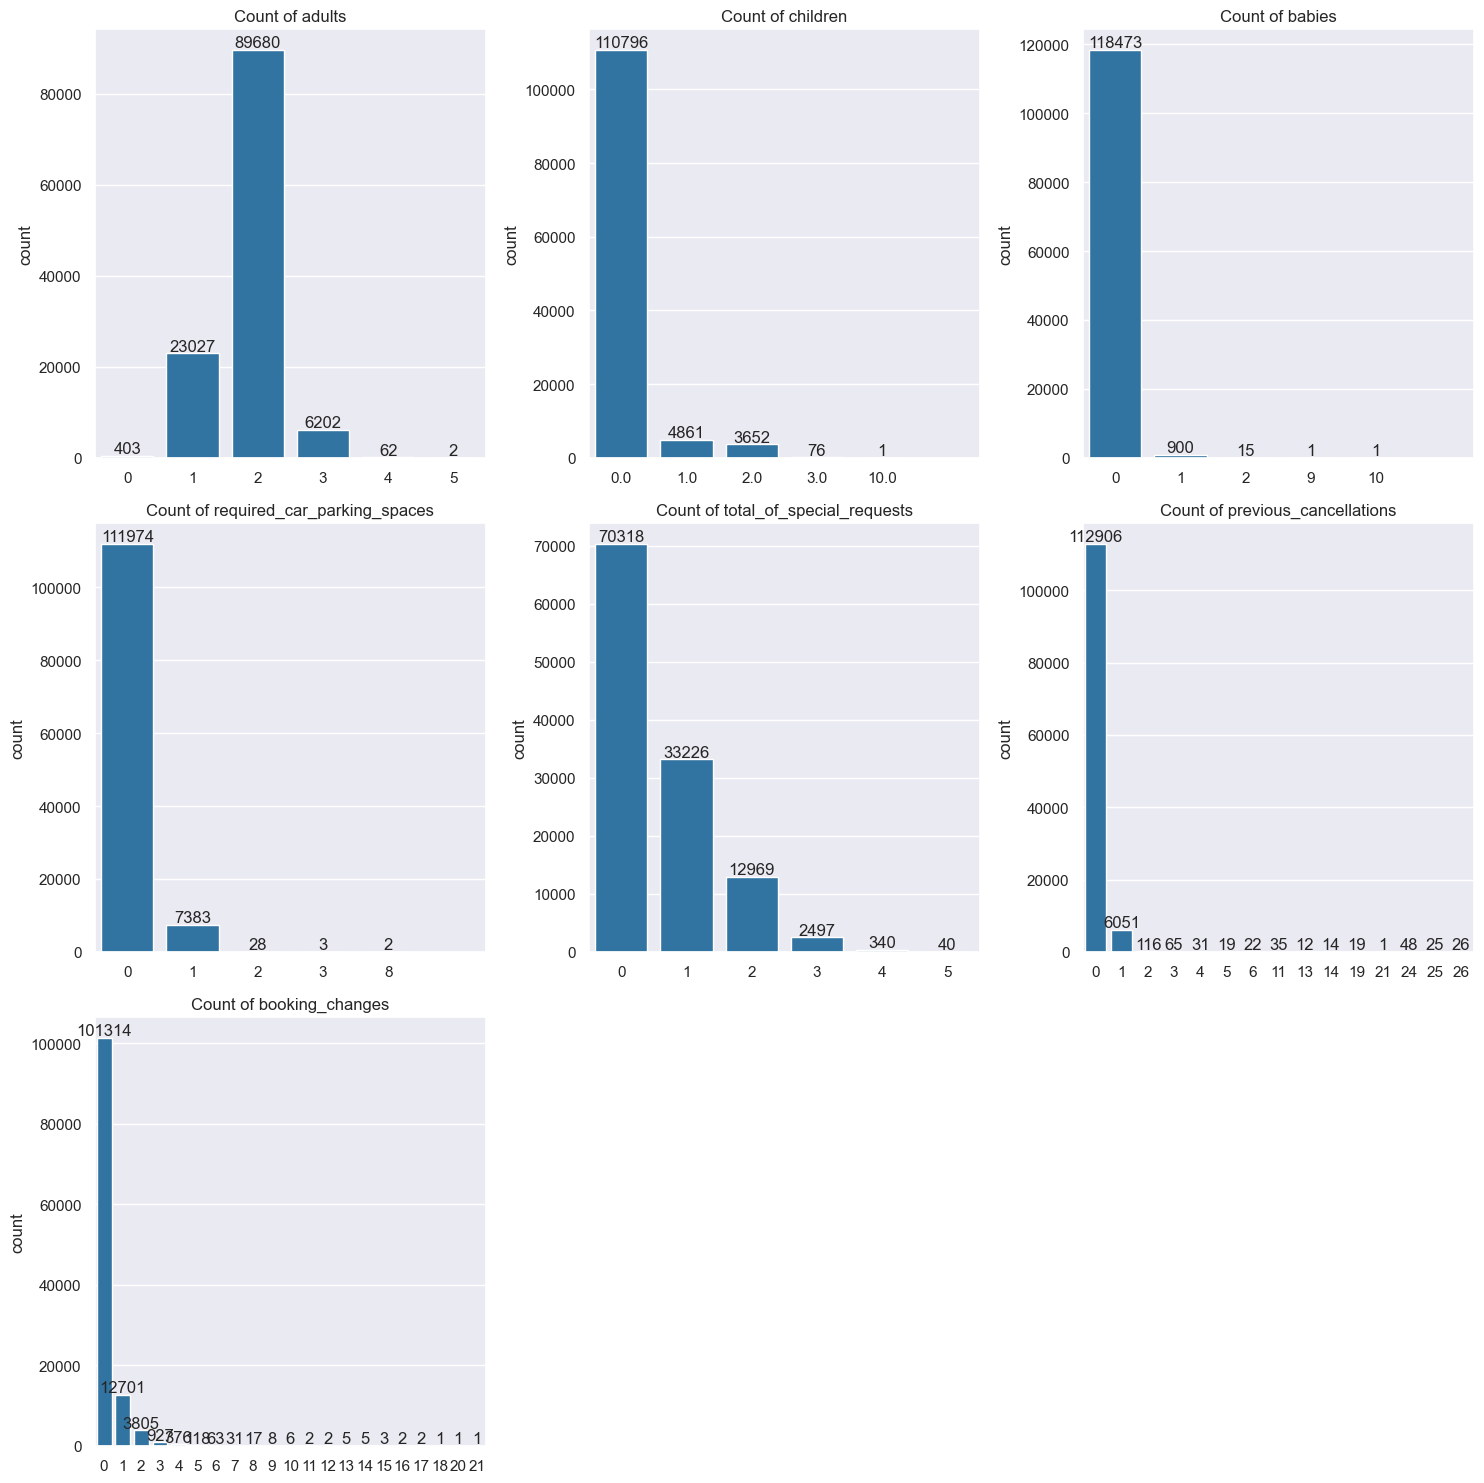

In [24]:
num_cols_to_plot = len(discrete_vars)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(discrete_vars):
    if i < len(axes):
        ax = axes[i]
        sns.countplot(x=col, data=df, ax=ax)
        ax.set_title(f"Count of {col}")
        ax.set_xlabel('')

        # Add numbers on top of bars
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points')

        # Adjust xlim for better visualization of common ranges
        if col in ['adults', 'children', 'babies', 'required_car_parking_spaces', 'total_of_special_requests']:
            max_val = df[col].max()
            # Limit x-axis to show common values, typically 0-5 for these variables
            ax.set_xlim(-0.5, min(max_val + 0.5, 5.5))

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Categorical Variables**

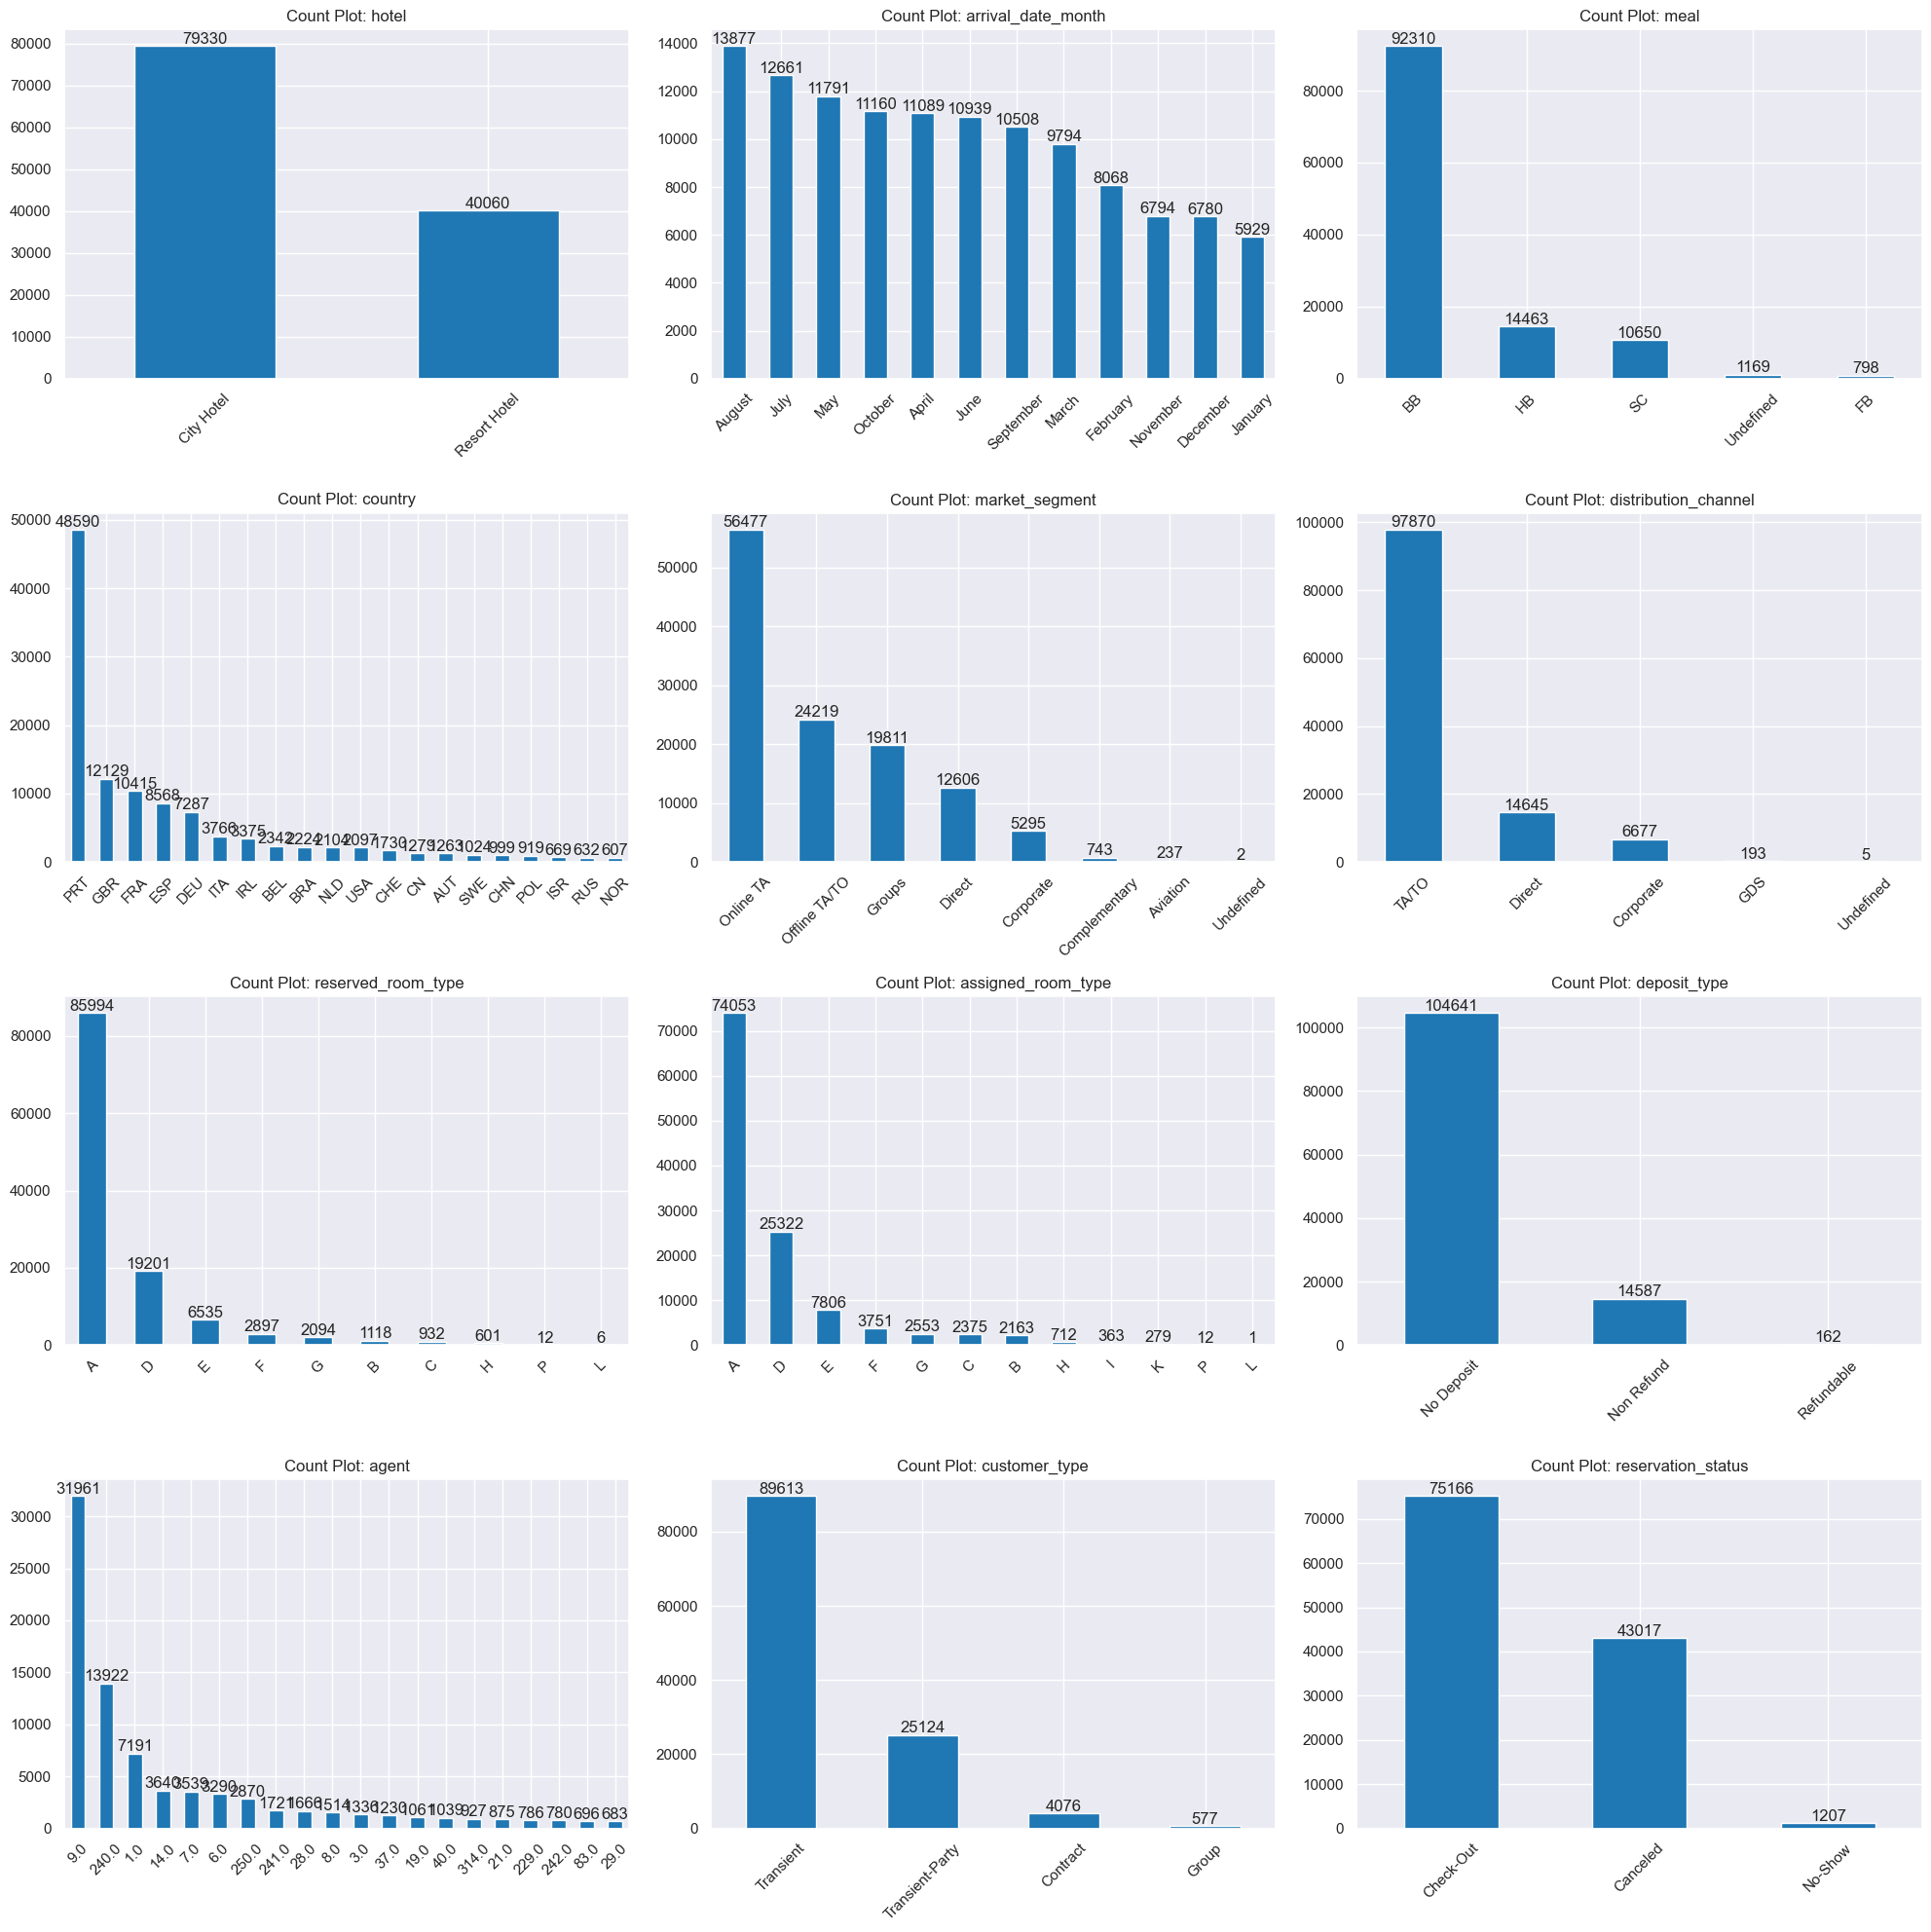

In [26]:
num_categorical_cols = len(categorical_cols)
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        current_ax = axes[i]
        # Plot top 20 value counts for each categorical column
        df[col].value_counts().head(20).plot(kind='bar', ax=current_ax)
        current_ax.set_title(f"Count Plot: {col}")
        current_ax.set_xlabel('')
        current_ax.tick_params(axis='x', rotation=45)

        # Add numbers on top of bars for the current subplot
        for p in current_ax.patches:
            current_ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', xytext=(0, 5), textcoords='offset points')


for j in range(num_categorical_cols, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Bivariate

**Numerical vs Target variable**

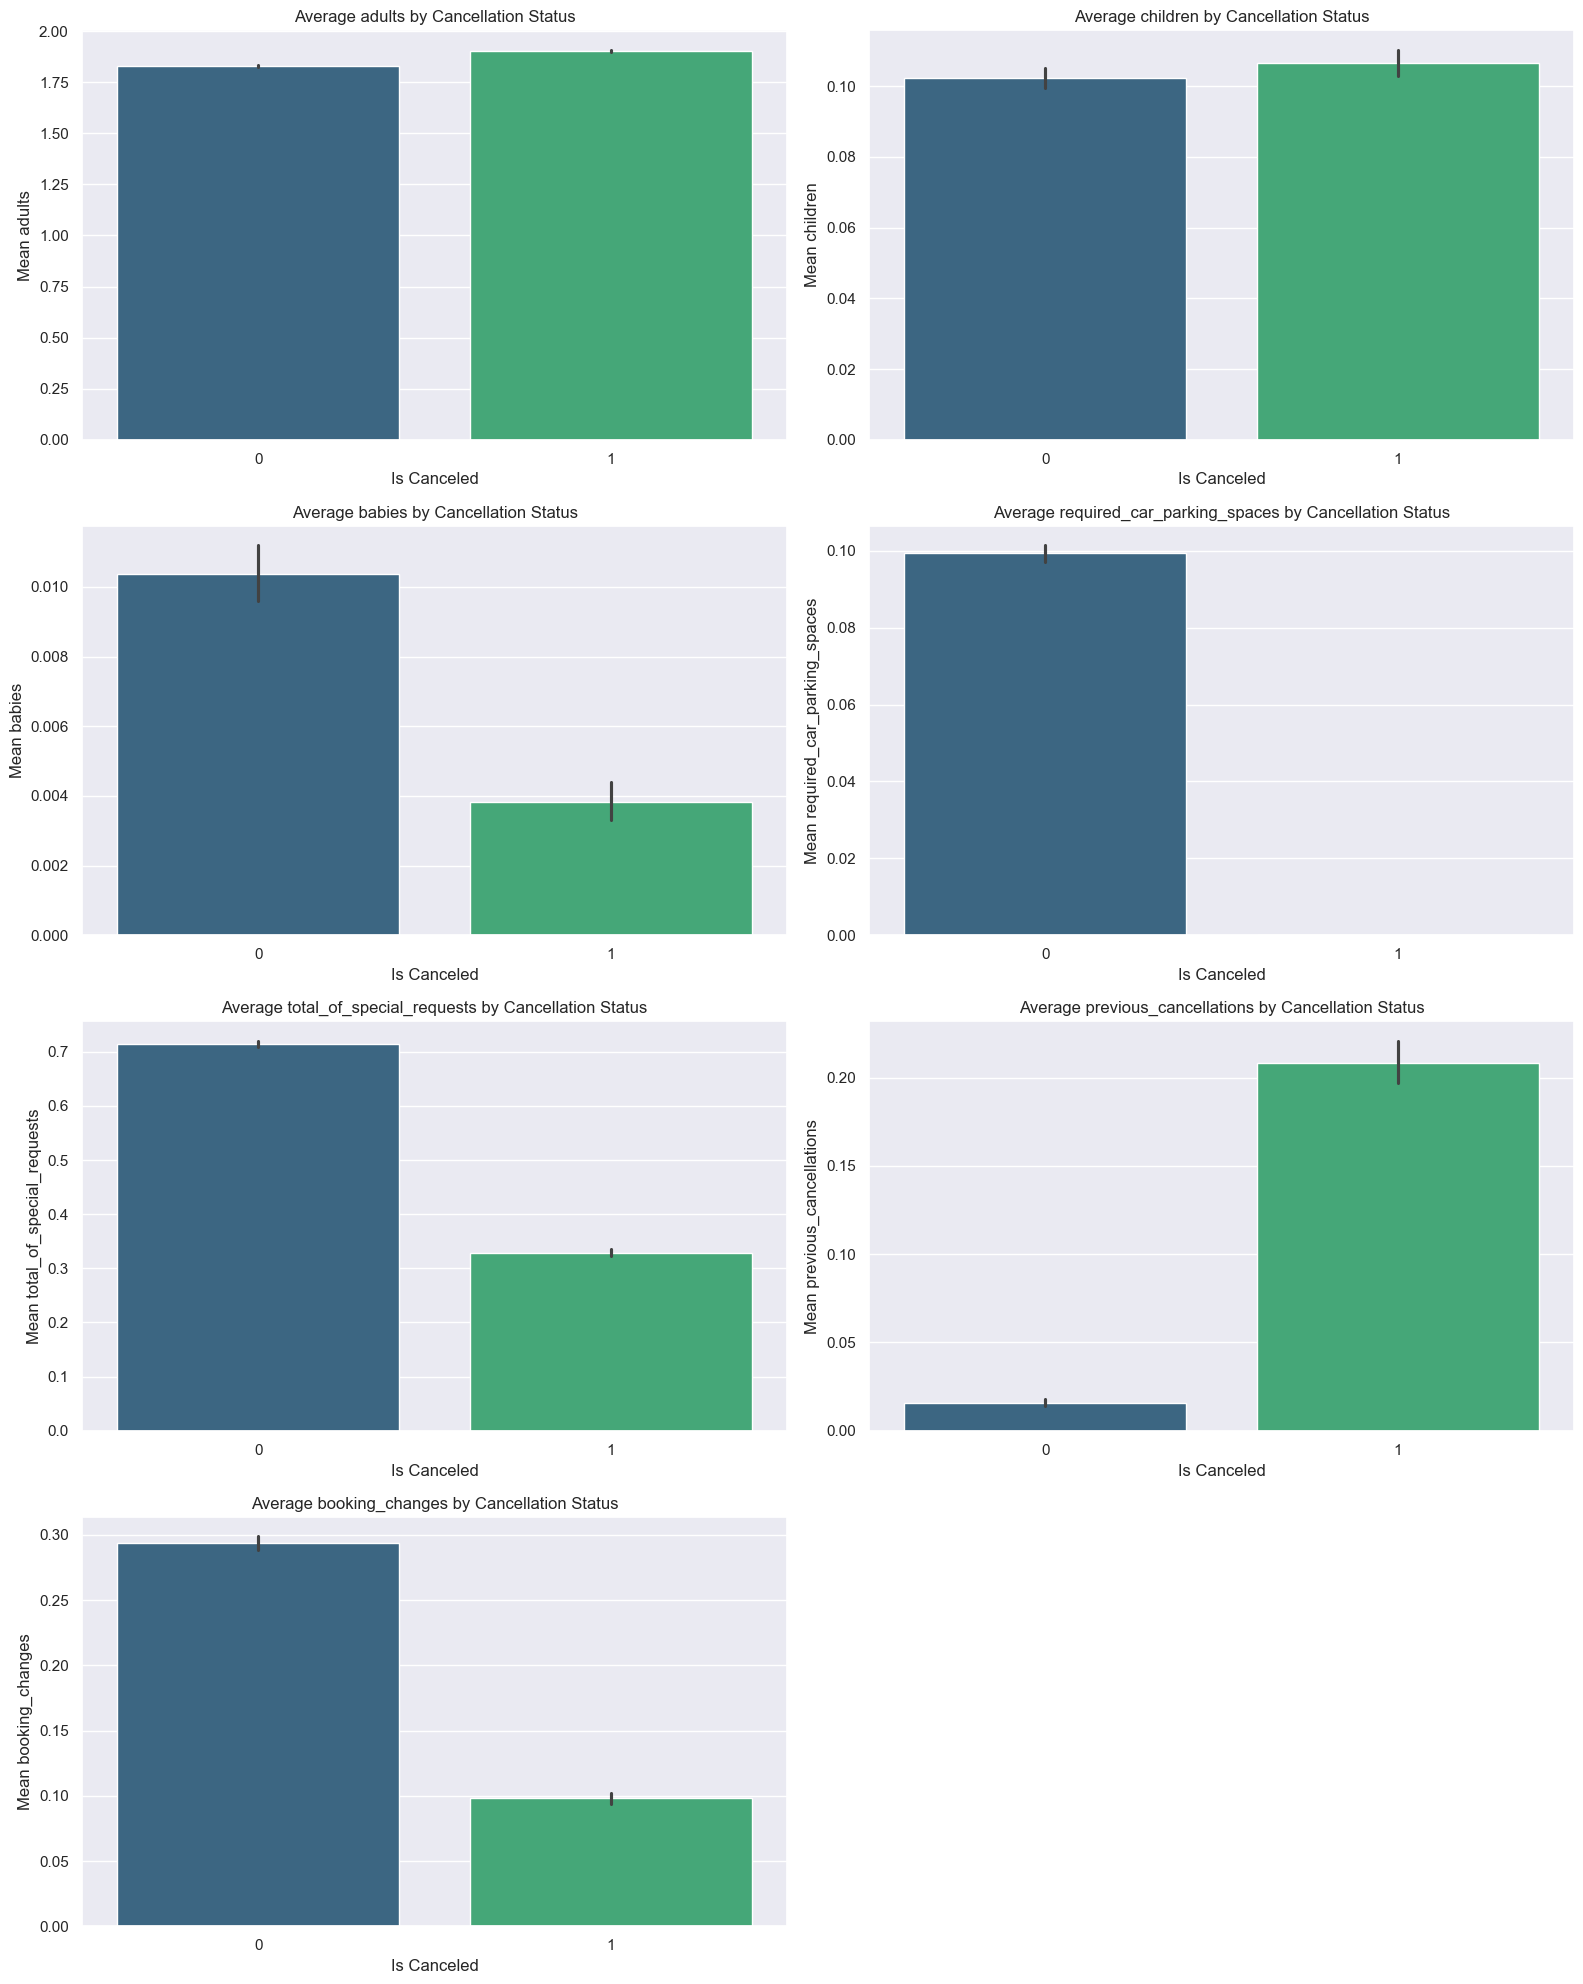

In [29]:
# Discrete variables vs Target

num_plots = len(discrete_vars)
n_cols = 2
n_rows = (num_plots + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
axes = axes.flatten()

for i, var in enumerate(discrete_vars):
    sns.barplot(x='is_canceled', y=var, data=df, ax=axes[i], palette='viridis')

    axes[i].set_title(f'Average {var} by Cancellation Status')
    axes[i].set_ylabel(f'Mean {var}')
    axes[i].set_xlabel('Is Canceled')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**History & Engagement** (previous_cancellations & special_requests)

  - History: Guests who have canceled before are highly likely to do so again.

  - Engagement: Guests who make special requests almost never cancel. They are engaged and committed.

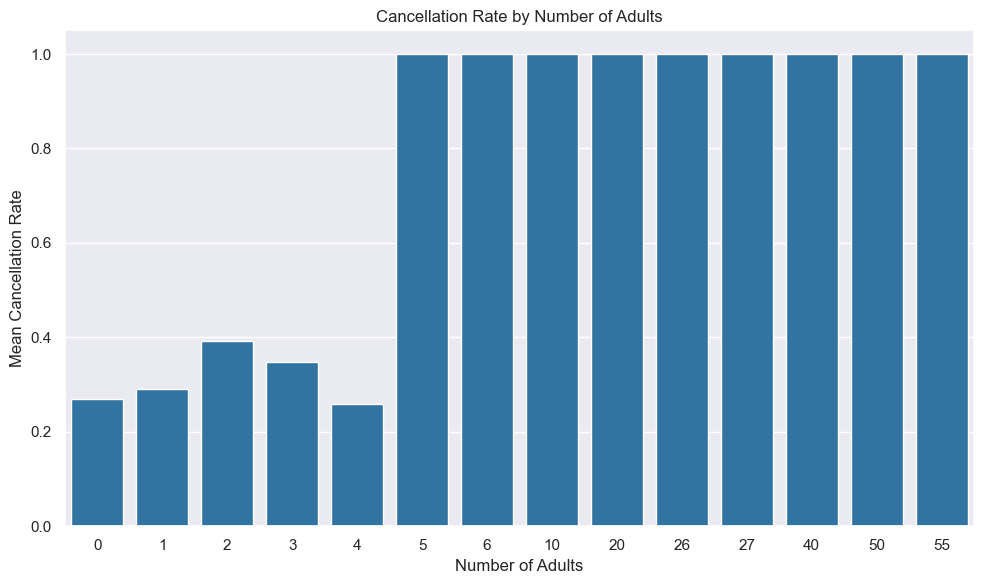

In [31]:
# Calculate the mean cancellation rate for each number of adults
cancellation_rate_by_adults = df.groupby('adults')['is_canceled'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='adults', y='is_canceled', data=cancellation_rate_by_adults)
plt.title('Cancellation Rate by Number of Adults')
plt.xlabel('Number of Adults')
plt.ylabel('Mean Cancellation Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Bookings with 2 adults have the highest cancellation rate among standard groups (~39%).

Bookings with 4 adults show the lowest cancellation risk for small groups (~25%).

Large groups (5 or more adults) consistently show a 100% cancellation rate, likely indicating data anomalies or prohibited booking types.

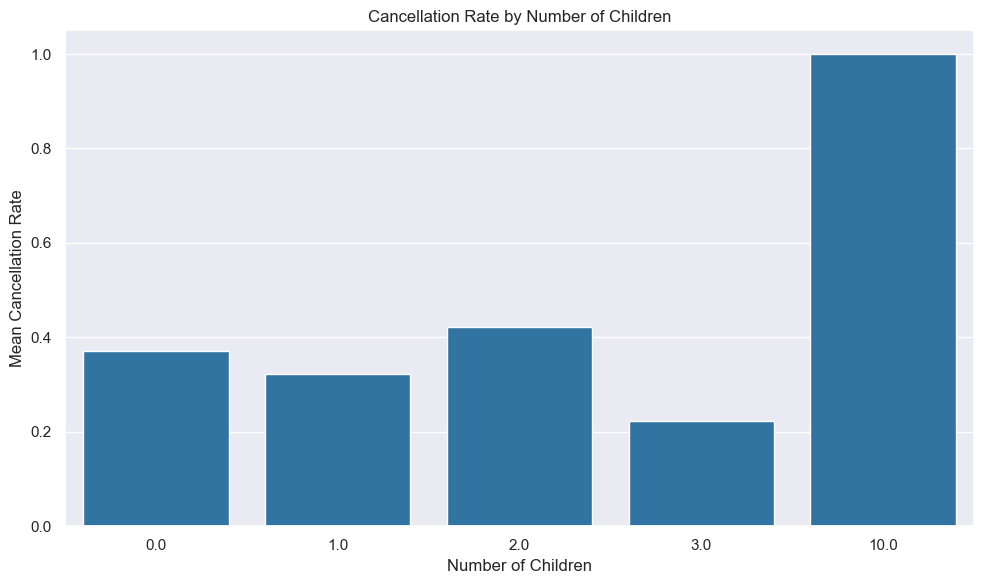

In [33]:
# Calculate the mean cancellation rate for each number of children
cancellation_rate_by_children = df.groupby('children')['is_canceled'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='children', y='is_canceled', data=cancellation_rate_by_children)
plt.title('Cancellation Rate by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Mean Cancellation Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Families with 2 children have the highest cancellation rate among standard groups (~42%).

Families with 3 children have significantly lower cancellation rates (~22%).

Extreme values (10 children) show a 100% cancellation rate but represent statistical outliers.

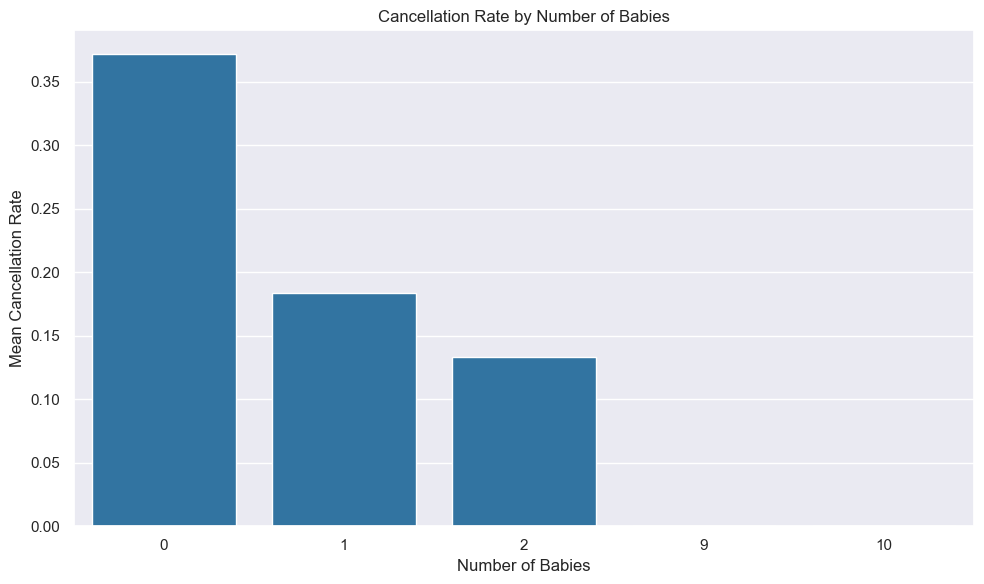

In [35]:
# Calculate the mean cancellation rate for each number of babies
cancellation_rate_by_babies = df.groupby('babies')['is_canceled'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='babies', y='is_canceled', data=cancellation_rate_by_babies)
plt.title('Cancellation Rate by Number of Babies')
plt.xlabel('Number of Babies')
plt.ylabel('Mean Cancellation Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Bookings with zero babies have the highest cancellation rate (~37–38%).

Bookings that include babies (1–2 babies) have significantly lower cancellation rates (13–18%).

Extreme values (9 or 10 babies) exist but represent outliers.

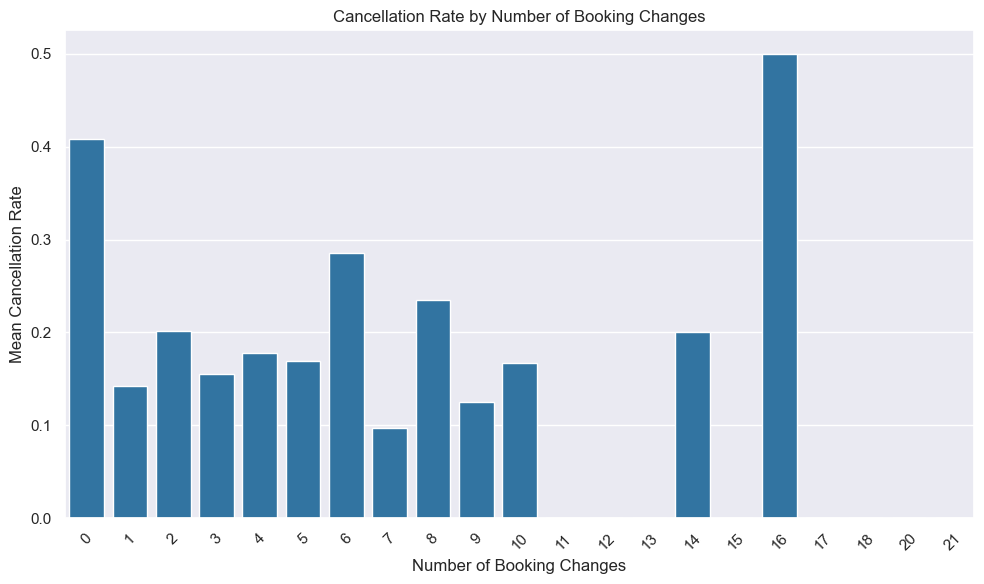

In [37]:
# Calculate the mean cancellation rate for each number of booking changes
cancellation_rate_by_changes = df.groupby('booking_changes')['is_canceled'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='booking_changes', y='is_canceled', data=cancellation_rate_by_changes)
plt.title('Cancellation Rate by Number of Booking Changes')
plt.xlabel('Number of Booking Changes')
plt.ylabel('Mean Cancellation Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Guests with zero booking changes have the highest cancellation rate (~40%).

Customers with 1–10 booking changes generally show lower cancellation rates (~10–25%).

A notable abnormal spike occurs at 16 booking changes (~50% cancellation rate).

**Categorical vs Target Variable**

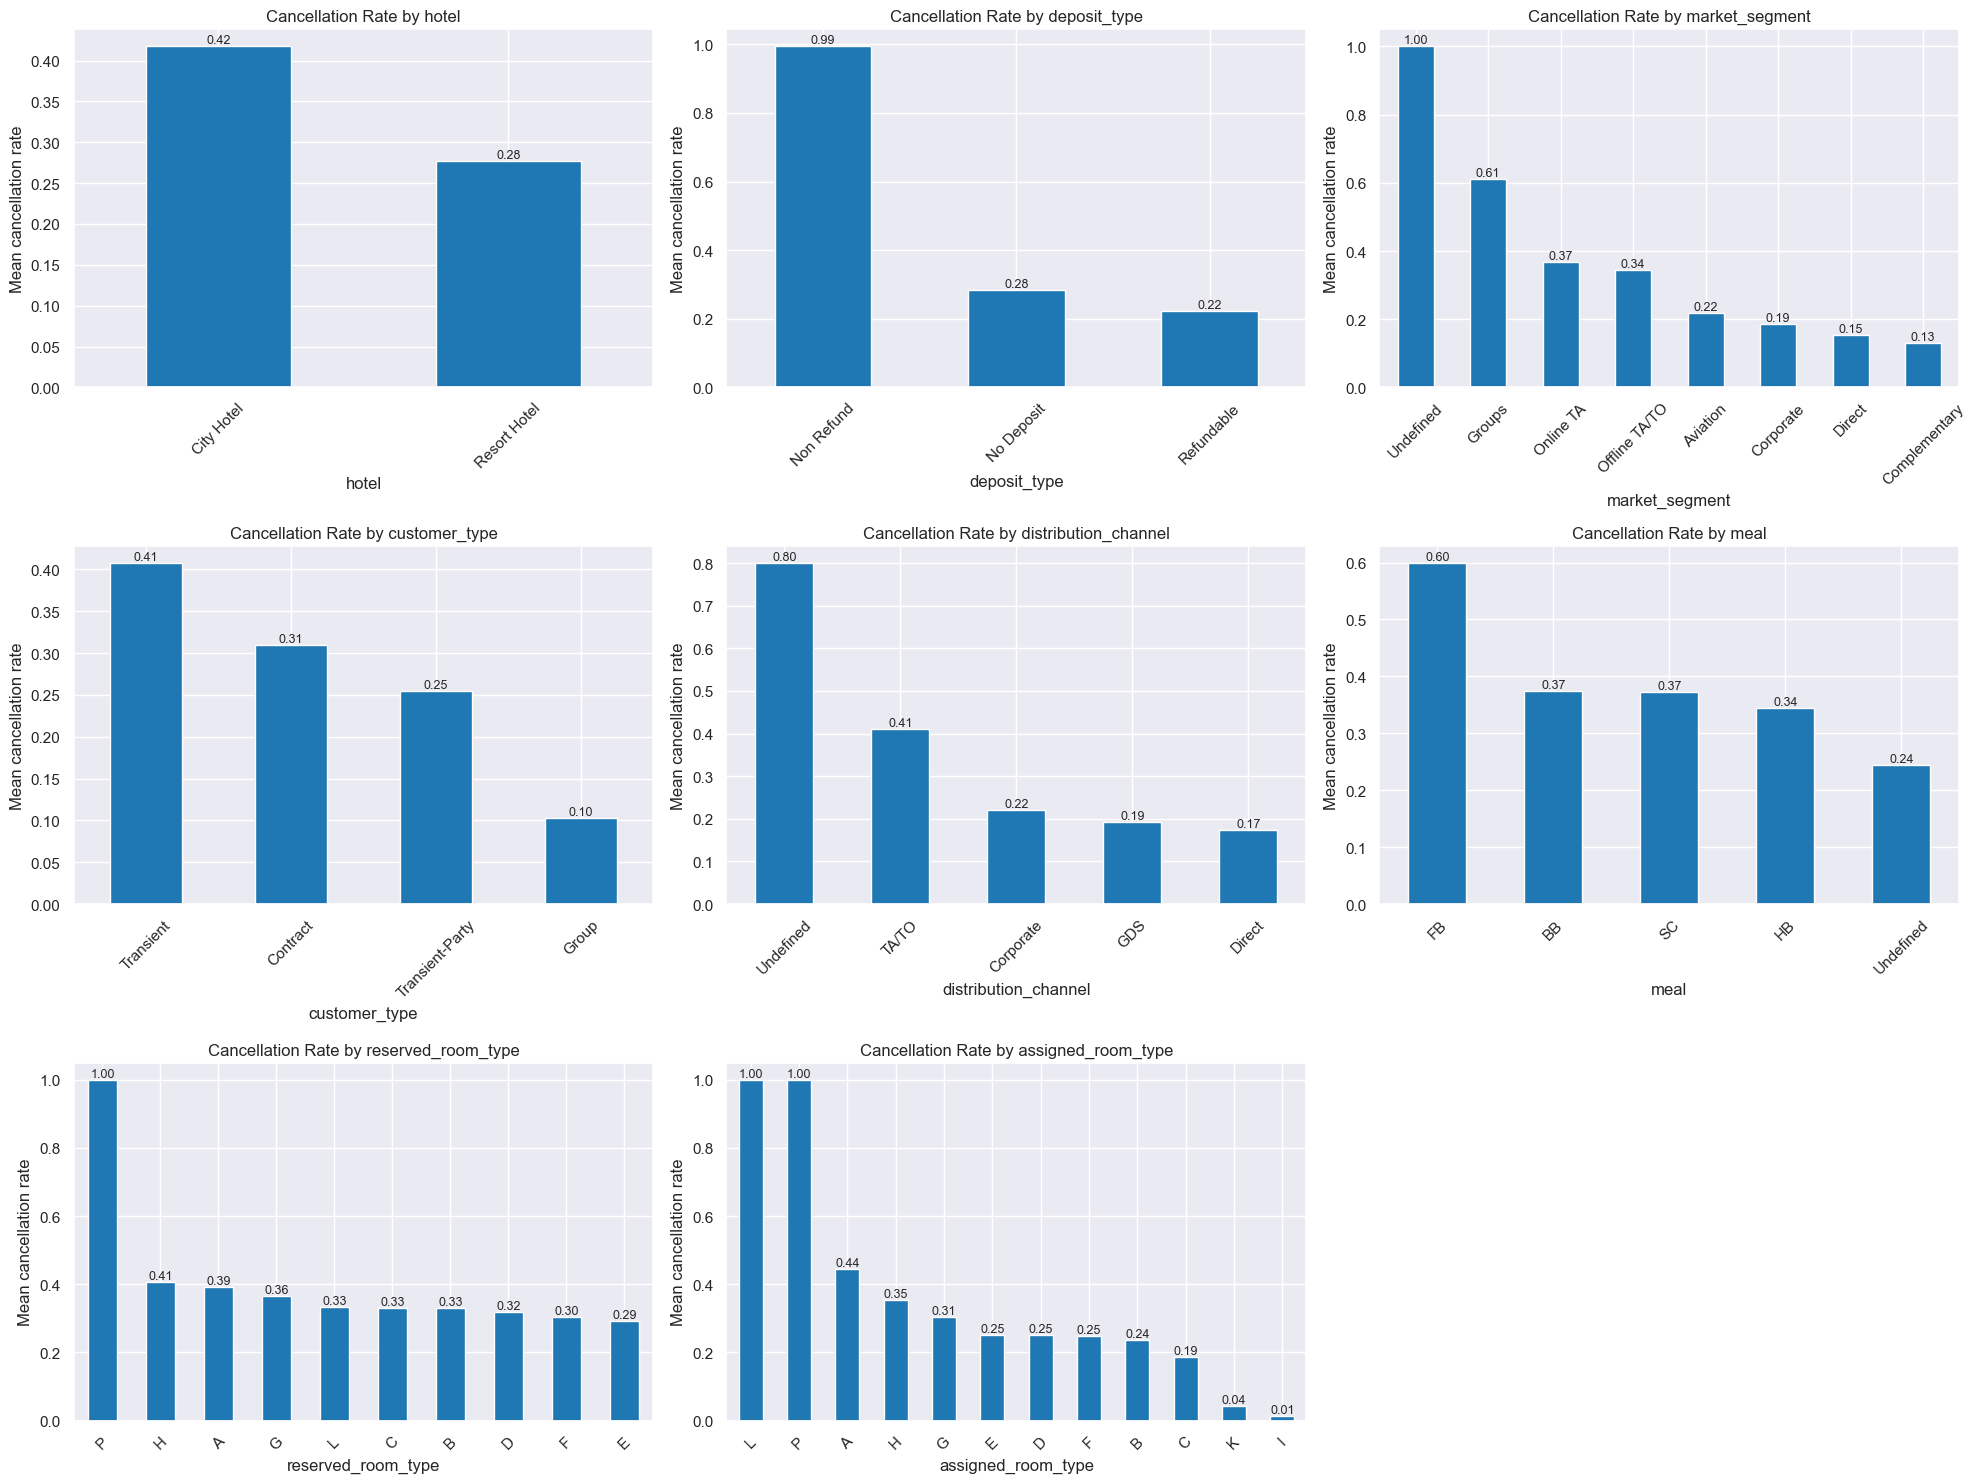

In [40]:
cat_targets = ["hotel", "deposit_type", "market_segment",
               "customer_type", "distribution_channel",
               "meal", "reserved_room_type", "assigned_room_type"]

num_plots = len(cat_targets)
n_rows = (num_plots + 3) // 3
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_targets):
    if col in df.columns and i < len(axes):
        ax = axes[i]

        cancel_rate = df.groupby(col)['is_canceled'].mean().sort_values(ascending=False)

        cancel_rate.plot(kind='bar', ax=ax)
        ax.set_title(f"Cancellation Rate by {col}")
        ax.set_ylabel("Mean cancellation rate")
        ax.tick_params(axis='x', rotation=45)

        for p in ax.patches:
            height = p.get_height()
            ax.text(
                p.get_x() + p.get_width() / 2.,
                height,
                f"{height:.2f}",
                ha='center',
                va='bottom',
                fontsize=9
            )


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


1. Deposit Type
  - Non-Refundable bookings show a suspicious ~99% cancellation rate (likely a data error or anomaly).

  - Refundable deposits are actually the safest option, with the lowest cancellation rate (~22%).

2. Customer Type
  - Transient customers (individual travelers) carry the highest risk (~41% cancellation).

  - Group bookings are the most reliable segment (~10% cancellation).

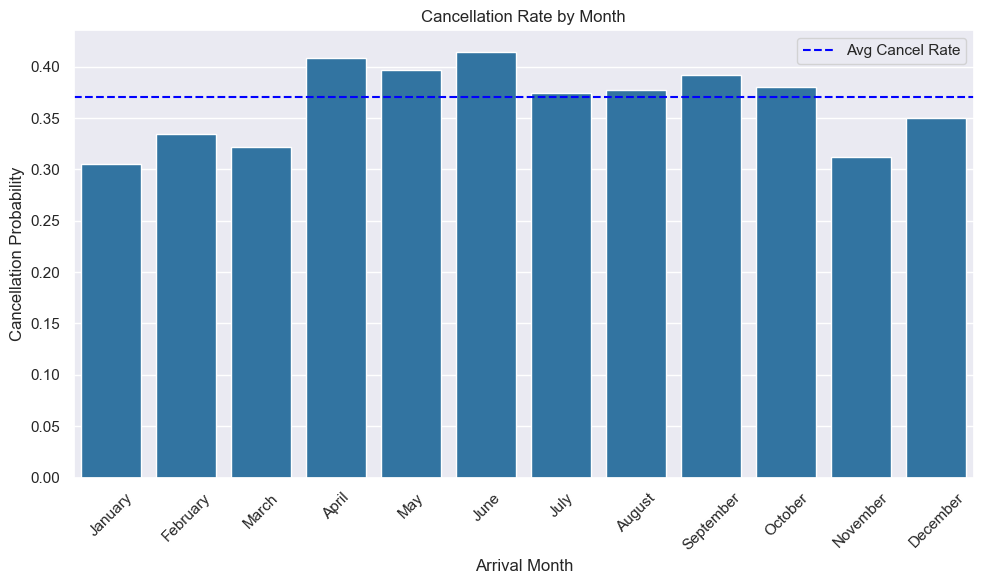

In [42]:
# Cancellation Rate by Month
monthly_cancel = df.groupby('arrival_date_month')['is_canceled'].mean().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_cancel.index, y=monthly_cancel.values)
plt.title('Cancellation Rate by Month')
plt.xlabel('Arrival Month')
plt.ylabel('Cancellation Probability')
plt.xticks(rotation=45)
plt.axhline(df['is_canceled'].mean(), color='blue', linestyle='--', label='Avg Cancel Rate')
plt.legend()
plt.tight_layout()
plt.show()

Cancellation rates follow a seasonal pattern. The highest cancellation rates occur in April and June (peak summer season), while the lowest rates are in January and November.

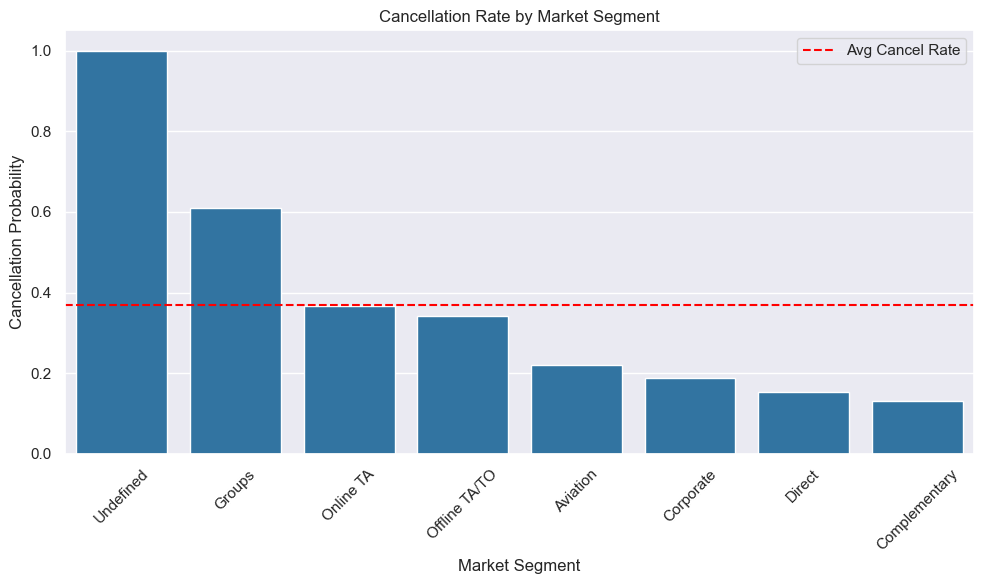

In [44]:
# Market Segment
segment_cancel = df.groupby('market_segment')['is_canceled'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=segment_cancel.index, y=segment_cancel.values)
plt.title('Cancellation Rate by Market Segment')
plt.tick_params(axis='x', rotation=45)
plt.xlabel('Market Segment')
plt.ylabel('Cancellation Probability')
plt.axhline(df['is_canceled'].mean(), color='red', linestyle='--', label='Avg Cancel Rate')
plt.legend()
plt.tight_layout()
plt.show()

Groups and Online Travel Agents (Online TA) have the highest cancellation rates.

Direct and Corporate bookings have significantly lower cancellation rates.

**Correlation Check**

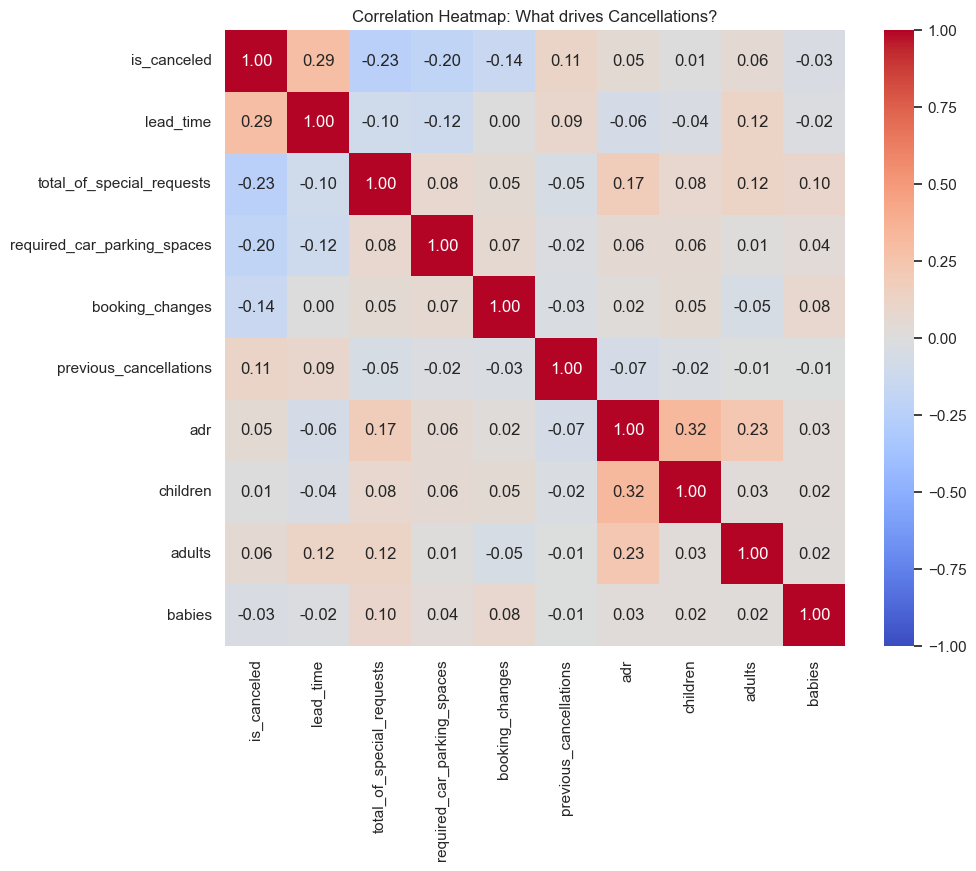

In [47]:
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation
numeric_cols = ['is_canceled', 'lead_time', 'total_of_special_requests',
                'required_car_parking_spaces', 'booking_changes',
                'previous_cancellations', 'adr', 'children', 'adults',
                'babies']

corr_matrix = df[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap: What drives Cancellations?')
plt.show()

In [48]:
# Get correlations with 'is_canceled'
cancel_correlations = corr_matrix['is_canceled'].drop('is_canceled')

sorted_cancel_correlations = cancel_correlations.sort_values(ascending=False)

print("Correlations with 'is_canceled' (sorted from high to low):\n")
print(sorted_cancel_correlations)


Correlations with 'is_canceled' (sorted from high to low):

lead_time                      0.293123
previous_cancellations         0.110133
adults                         0.060017
adr                            0.047557
children                       0.005048
babies                        -0.032491
booking_changes               -0.144381
required_car_parking_spaces   -0.195498
total_of_special_requests     -0.234658
Name: is_canceled, dtype: float64


**Correlation summary**

  - Positive Correlation: lead_time is the strongest numerical predictor of cancellation.

  - Negative Correlation: total_of_special_requests, required_car_parking_spaces, and booking_changes are negatively correlated, meaning higher values in these features reduce the likelihood of cancellation.

- lead_time
- deposit_type
- previous_cancellations
- booking_changes
- market_segments
- customer_type
- adr
- children / aldults / babies
- monthly_cancel

 # Data Preprocessing

## Duplicate Checking

In [53]:
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
77,Resort Hotel,0,17,2016,June,27,30,0,0,2,...,No Deposit,240.0,NaN,0,Transient-Party,0.0,0,0,Check-Out,6/30/2016
162,Resort Hotel,0,10,2015,August,34,20,0,0,2,...,No Deposit,240.0,NaN,0,Transient,0.0,0,2,Check-Out,8/20/2015
173,Resort Hotel,0,153,2015,October,42,16,0,0,2,...,No Deposit,240.0,NaN,0,Transient-Party,0.0,0,3,Check-Out,10/16/2015
176,Resort Hotel,1,28,2015,October,43,21,0,2,2,...,No Deposit,208.0,NaN,0,Transient-Party,0.0,0,0,Canceled,10/2/2015
198,Resort Hotel,1,20,2016,March,13,21,1,3,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,1,Canceled,3/21/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119157,Resort Hotel,0,31,2016,December,53,30,0,2,2,...,No Deposit,NaN,NaN,0,Transient-Party,305.0,0,1,Check-Out,1/1/2017
119193,Resort Hotel,0,83,2017,August,34,21,1,4,2,...,No Deposit,196.0,NaN,0,Transient,310.0,0,0,Check-Out,8/26/2017
119267,Resort Hotel,0,31,2016,December,53,30,0,2,2,...,No Deposit,NaN,NaN,0,Transient-Party,325.0,0,1,Check-Out,1/1/2017
119268,Resort Hotel,0,31,2016,December,53,30,0,2,2,...,No Deposit,NaN,NaN,0,Transient-Party,325.0,0,1,Check-Out,1/1/2017


In [54]:
df[df.duplicated(keep=False)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
76,Resort Hotel,0,17,2016,June,27,30,0,0,2,...,No Deposit,240.0,NaN,0,Transient-Party,0.0,0,0,Check-Out,6/30/2016
77,Resort Hotel,0,17,2016,June,27,30,0,0,2,...,No Deposit,240.0,NaN,0,Transient-Party,0.0,0,0,Check-Out,6/30/2016
161,Resort Hotel,0,10,2015,August,34,20,0,0,2,...,No Deposit,240.0,NaN,0,Transient,0.0,0,2,Check-Out,8/20/2015
162,Resort Hotel,0,10,2015,August,34,20,0,0,2,...,No Deposit,240.0,NaN,0,Transient,0.0,0,2,Check-Out,8/20/2015
172,Resort Hotel,0,153,2015,October,42,16,0,0,2,...,No Deposit,240.0,NaN,0,Transient-Party,0.0,0,3,Check-Out,10/16/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119266,Resort Hotel,0,31,2016,December,53,30,0,2,2,...,No Deposit,NaN,NaN,0,Transient-Party,325.0,0,1,Check-Out,1/1/2017
119267,Resort Hotel,0,31,2016,December,53,30,0,2,2,...,No Deposit,NaN,NaN,0,Transient-Party,325.0,0,1,Check-Out,1/1/2017
119268,Resort Hotel,0,31,2016,December,53,30,0,2,2,...,No Deposit,NaN,NaN,0,Transient-Party,325.0,0,1,Check-Out,1/1/2017
119319,Resort Hotel,0,31,2016,December,53,30,0,2,2,...,No Deposit,NaN,NaN,0,Transient-Party,340.0,0,1,Check-Out,1/1/2017


In [55]:
df.drop_duplicates(inplace=True)

In [56]:
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [57]:
df.shape

(87396, 32)

## Missing Value Checking

In [59]:
df.isnull().sum()[df.isnull().sum() > 0]

children        4
country       452
agent       12193
company     82137
dtype: int64

### 'Company' attribute

In [61]:
df['company'].isnull().sum()

82137

In [62]:
df = df.drop(columns=['company'])

### 'Children' attribute

In [64]:
df['children'] = df['children'].fillna(df['children'].mean())

In [65]:
df['children'].isnull().sum()

0

### 'Country' attribute

In [67]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
days_in_waiting_list                  0


In [68]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# ====== 1. XÁC ĐỊNH CỘT MỤC TIÊU ======
target = "country"
leakage_cols = [
    "reservation_status",       # KẾT QUẢ TRỰC TIẾP
    "reservation_status_date",  # thời điểm biết kết quả
    "assigned_room_type",       # thường assign sau khi confirm
    "booking_changes",
    "days_in_waiting_list",
    "previous_cancellations",
    "previous_bookings_not_canceled",
]
df = df.drop(columns=[col for col in leakage_cols if col in df.columns])
# ====== 2. CHIA DATA THÀNH TRAIN (không missing) và TEST (missing) ======

train_df = df[df[target].notna()]
test_df  = df[df[target].isna()]


In [69]:
train_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,Groups,Direct,1,A,No Deposit,273.0,Transient-Party,-6.38,0,0
1,City Hotel,0,4,2015,December,50,11,0,1,2,...,Complementary,Direct,0,B,No Deposit,45.0,Transient,0.00,0,0
2,City Hotel,0,15,2015,December,51,17,0,2,2,...,Complementary,Direct,0,G,No Deposit,NaN,Transient,0.00,0,0
3,Resort Hotel,1,5,2016,August,32,2,0,1,2,...,Direct,Direct,0,C,No Deposit,NaN,Transient,0.00,0,0
4,Resort Hotel,0,1,2016,February,8,20,0,1,2,...,Complementary,Direct,0,H,No Deposit,NaN,Transient,0.00,1,2


In [70]:
test_df.shape

(452, 24)

In [71]:
test_df['country'].head(10)

102     NaN
1003    NaN
1006    NaN
1007    NaN
1008    NaN
1009    NaN
1010    NaN
1011    NaN
1012    NaN
1013    NaN
Name: country, dtype: object

In [72]:
# ====== 3. FEATURES ĐỂ TRAIN ======
features = [col for col in df.columns if col != target]

X_train = train_df.drop(columns=["country", "is_canceled"])
y_train = train_df["country"]

X_test  = test_df.drop(columns=["country", "is_canceled"])

le = LabelEncoder()
y_train = le.fit_transform(train_df[target])
y_train

array([ 59, 135, 135, ..., 135,  81, 135])

In [73]:
X_train.head(5)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,195,2017,March,10,5,4,6,2,0.0,...,Groups,Direct,1,A,No Deposit,273.0,Transient-Party,-6.38,0,0
1,City Hotel,4,2015,December,50,11,0,1,2,2.0,...,Complementary,Direct,0,B,No Deposit,45.0,Transient,0.00,0,0
2,City Hotel,15,2015,December,51,17,0,2,2,2.0,...,Complementary,Direct,0,G,No Deposit,NaN,Transient,0.00,0,0
3,Resort Hotel,5,2016,August,32,2,0,1,2,1.0,...,Direct,Direct,0,C,No Deposit,NaN,Transient,0.00,0,0
4,Resort Hotel,1,2016,February,8,20,0,1,2,1.0,...,Complementary,Direct,0,H,No Deposit,NaN,Transient,0.00,1,2


In [74]:
X_test.head(5)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests
102,Resort Hotel,131,2016,July,28,9,3,6,2,1.0,...,Direct,Direct,0,C,No Deposit,NaN,Transient,0.0,1,0
1003,Resort Hotel,0,2016,March,12,16,0,2,1,0.0,...,Complementary,Direct,0,A,No Deposit,NaN,Transient,0.0,0,0
1006,Resort Hotel,0,2016,December,51,14,0,0,1,0.0,...,Corporate,Corporate,0,A,No Deposit,NaN,Transient,0.0,0,0
1007,Resort Hotel,0,2017,January,2,9,1,2,1,0.0,...,Complementary,Direct,0,A,No Deposit,NaN,Group,0.0,0,0
1008,Resort Hotel,0,2017,March,9,1,0,1,1,0.0,...,Direct,Direct,0,A,No Deposit,NaN,Transient,0.0,0,0


In [75]:
# 5. OneHotEncoder cho features (mã hóa categorical)
from sklearn.preprocessing import OneHotEncoder
categorical_cols = X_train.select_dtypes(include=['object']).columns
categorical_cols

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type', 'agent',
       'customer_type'],
      dtype='object')

In [76]:
for col in categorical_cols:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

In [77]:
X_train_encoded.shape

(86944, 382)

In [78]:
X_train.shape

(86944, 22)

In [79]:
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [80]:
encoded_train_df = pd.DataFrame(
    X_train_encoded,
    columns=encoder.get_feature_names_out(categorical_cols),
    index=X_train.index
)

encoded_test_df = pd.DataFrame(
    X_test_encoded,
    columns=encoder.get_feature_names_out(categorical_cols),
    index=X_test.index
)

X_train_numeric = X_train[numeric_cols]
X_test_numeric = X_test[numeric_cols]

X_train_final = pd.concat([X_train_numeric, encoded_train_df], axis=1)
X_test_final  = pd.concat([X_test_numeric, encoded_test_df], axis=1)


In [81]:
X_test_final.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,agent_94.0,agent_95.0,agent_96.0,agent_98.0,agent_99.0,agent_nan,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
102,131,2016,28,9,3,6,2,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1003,0,2016,12,16,0,2,1,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1006,0,2016,51,14,0,0,1,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1007,0,2017,2,9,1,2,1,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1008,0,2017,9,1,0,1,1,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [82]:
X_test_final.shape

(452, 395)

In [83]:
train_small = train_df.sample(10000, random_state=42)
pos_idx = train_df.index.get_indexer_for(train_small.index)

X_small = X_train_final.iloc[pos_idx]
y_small = y_train[pos_idx]


In [84]:
print(X_small.shape, y_small.shape)

(10000, 395) (10000,)


In [85]:
model = RandomForestClassifier(
    n_estimators=30,
    max_depth=12,
    n_jobs=-1,
    random_state=42
)

model.fit(X_small, y_small)

RandomForestClassifier(max_depth=12, n_estimators=30, n_jobs=-1,
                       random_state=42)

In [86]:
y_pred_encoded = model.predict(X_test_final)

In [87]:
y_pred = le.inverse_transform(y_pred_encoded)

In [88]:
df.loc[test_df.index, target] = y_pred

In [89]:
df['country'].isnull().sum()

0

### 'Agent' attribute

In [91]:
import numpy as np

df['agent'] = np.where(df['agent'].isna(), 'No Agent', 'Agent')


In [92]:
df['agent'].isnull().sum()

0

In [93]:
df['agent'].value_counts()

agent
Agent       75203
No Agent    12193
Name: count, dtype: int64

### Final Checking

In [95]:
df.isnull().sum()

hotel                          0
is_canceled                    0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
arrival_date_week_number       0
arrival_date_day_of_month      0
stays_in_weekend_nights        0
stays_in_week_nights           0
adults                         0
children                       0
babies                         0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
is_repeated_guest              0
reserved_room_type             0
deposit_type                   0
agent                          0
customer_type                  0
adr                            0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

## Outlier Detection

In [97]:
num_cols = [
    'lead_time',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'babies',
    'adr',
    'required_car_parking_spaces',
    'total_of_special_requests'
]

In [98]:
def detect_outliers(df, columns):
    outlier_report = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower) | (df[col] > upper)][col]

        outlier_report[col] = {
            'num_outliers': outliers.shape[0],
            'lower_bound': lower,
            'upper_bound': upper,
            'min_value': df[col].min(),
            'max_value': df[col].max()
        }

    return pd.DataFrame(outlier_report).T

In [99]:
outliers_summary = detect_outliers(df, num_cols)
outliers_summary

,num_outliers,lower_bound,upper_bound,min_value,max_value
lead_time,2396.0,-160.0,296.0,0.00,737.0
stays_in_weekend_nights,220.0,-3.0,5.0,0.00,19.0
stays_in_week_nights,1531.0,-3.5,8.5,0.00,50.0
adults,22899.0,2.0,2.0,0.00,55.0
children,8368.0,0.0,0.0,0.00,10.0
babies,914.0,0.0,0.0,0.00,10.0
adr,2490.0,-21.0,227.0,-6.38,5400.0
required_car_parking_spaces,7313.0,0.0,0.0,0.00,8.0
total_of_special_requests,2673.0,-1.5,2.5,0.00,5.0


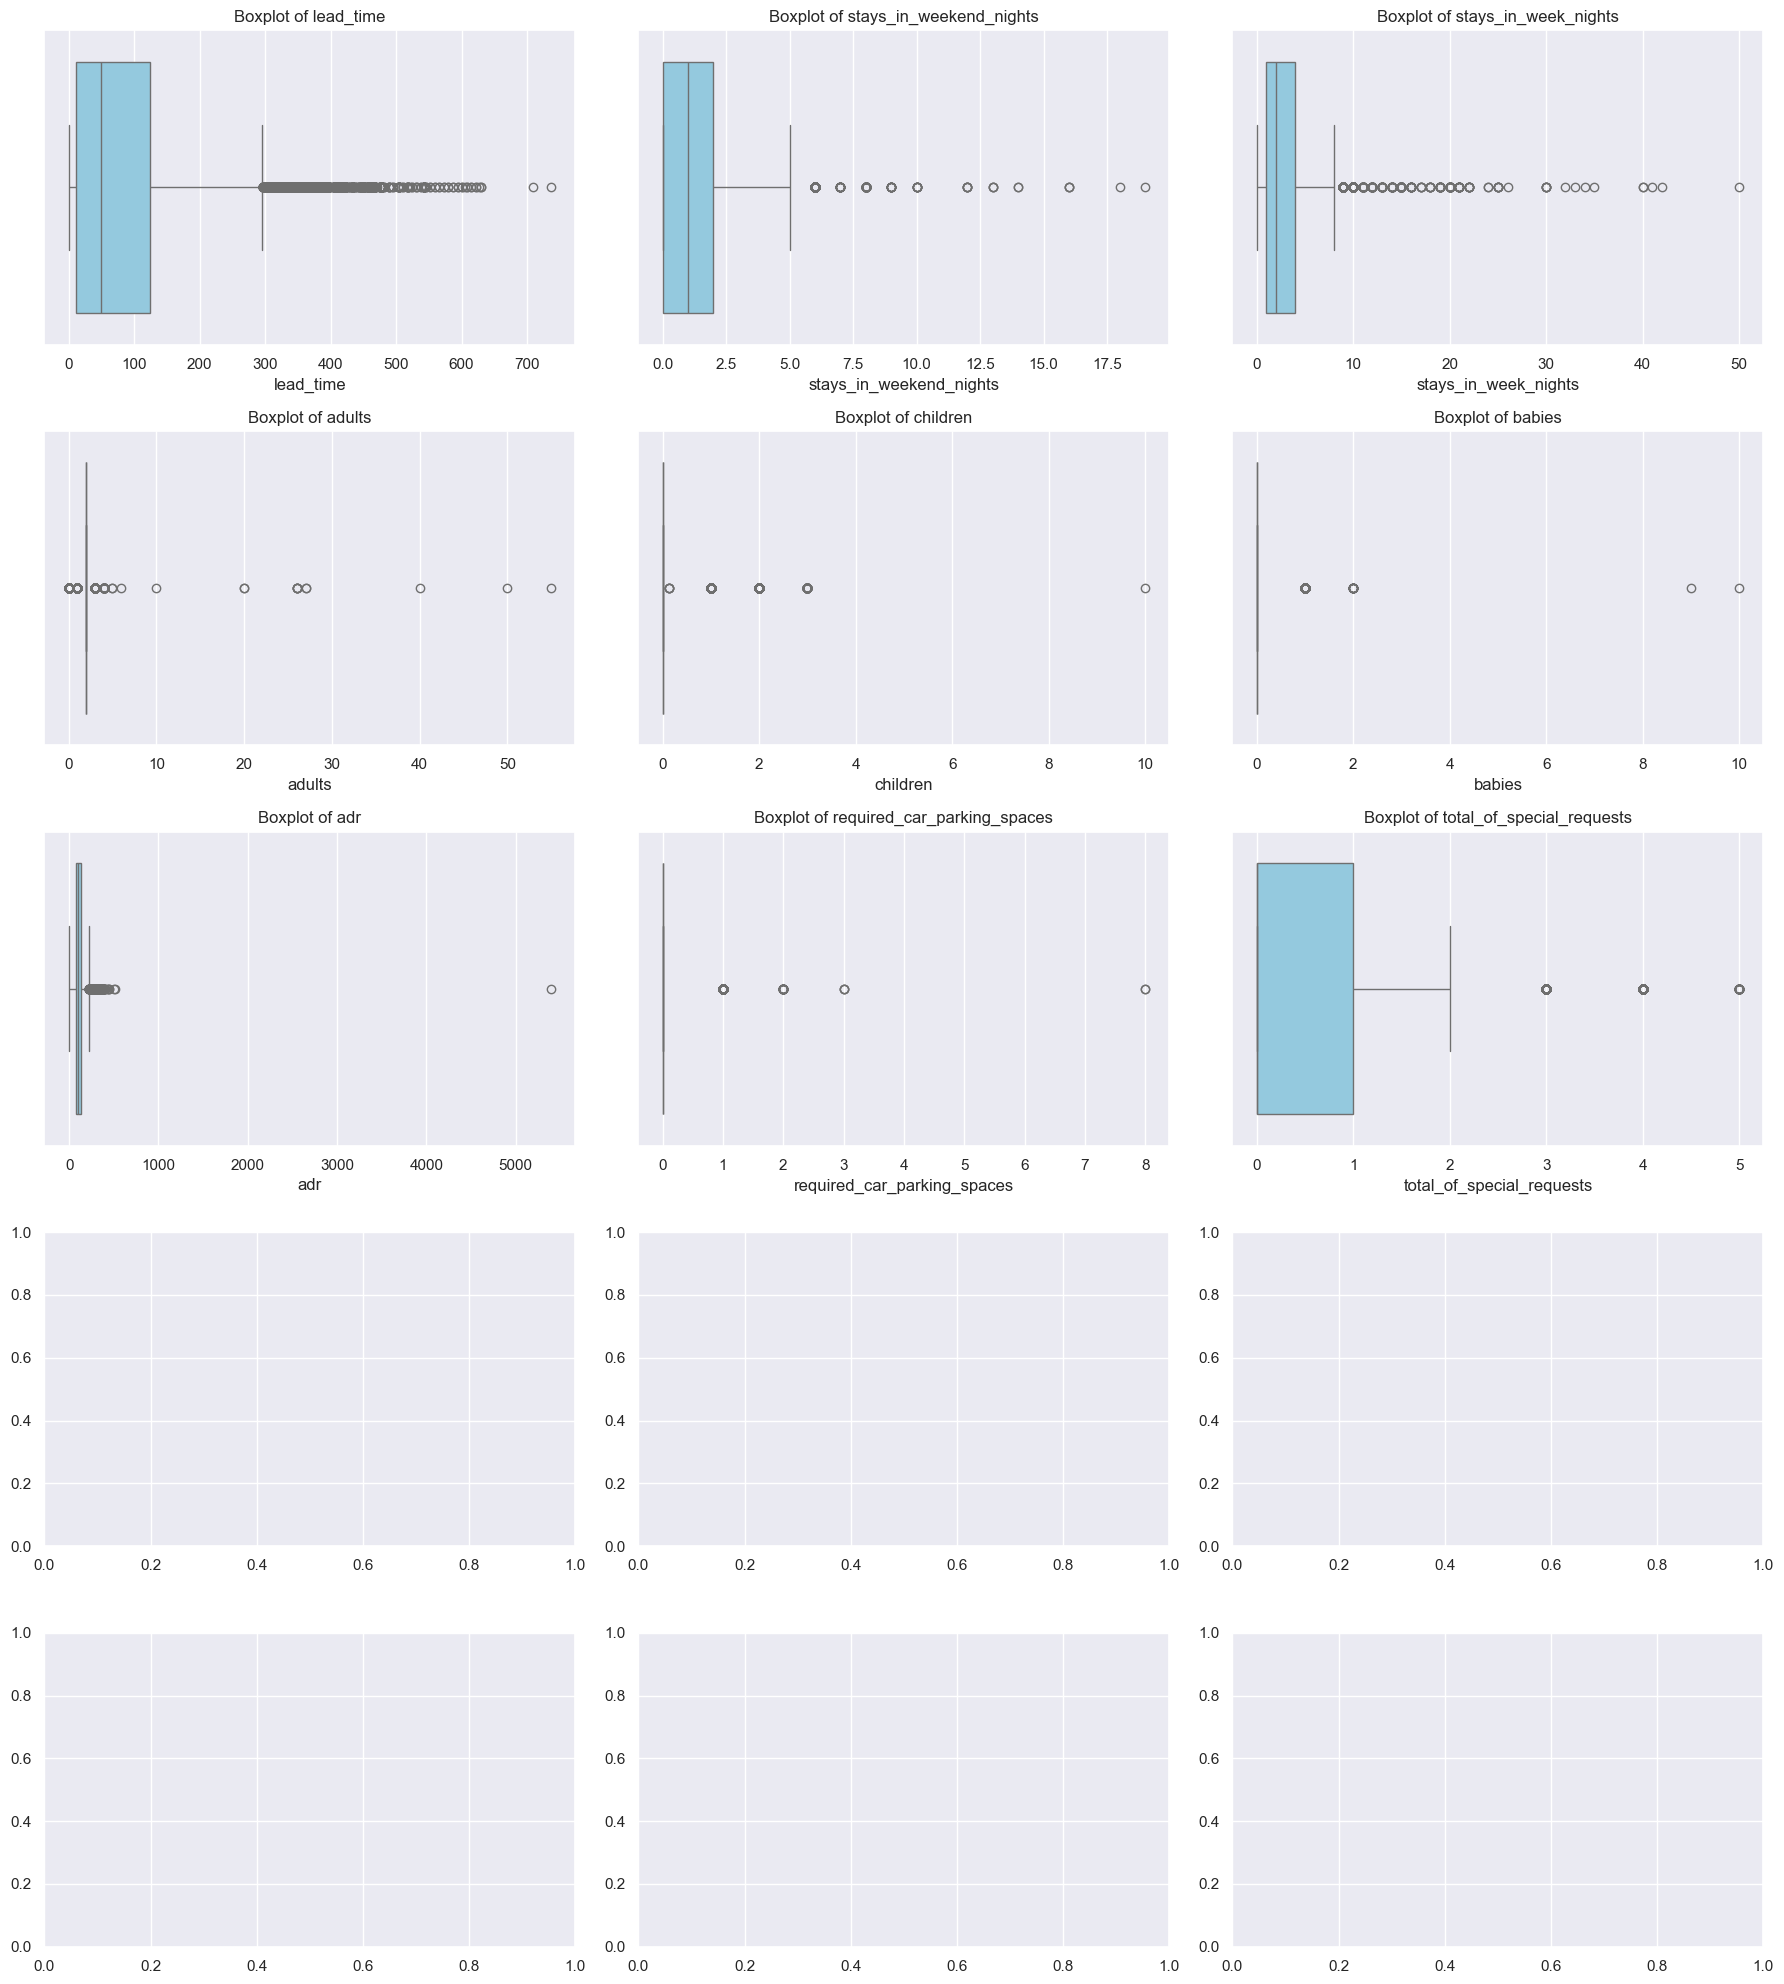

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 20))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


In [101]:
df = df[df['adr'] < 5000]
df = df[df['children'] < 10]
df = df[df['adults'] < 10]
df = df[df['babies'] < 9]
df.shape

(87379, 24)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87379 entries, 0 to 119388
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        87379 non-null  object 
 1   is_canceled                  87379 non-null  int64  
 2   lead_time                    87379 non-null  int64  
 3   arrival_date_year            87379 non-null  int64  
 4   arrival_date_month           87379 non-null  object 
 5   arrival_date_week_number     87379 non-null  int64  
 6   arrival_date_day_of_month    87379 non-null  int64  
 7   stays_in_weekend_nights      87379 non-null  int64  
 8   stays_in_week_nights         87379 non-null  int64  
 9   adults                       87379 non-null  int64  
 10  children                     87379 non-null  float64
 11  babies                       87379 non-null  int64  
 12  meal                         87379 non-null  object 
 13  country             

## Categorical Column Encoding

In [104]:
y = df["is_canceled"]
X = df.drop("is_canceled", axis=1)

In [105]:
X.head(5)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,195,2017,March,10,5,4,6,2,0.0,...,Groups,Direct,1,A,No Deposit,Agent,Transient-Party,-6.38,0,0
1,City Hotel,4,2015,December,50,11,0,1,2,2.0,...,Complementary,Direct,0,B,No Deposit,Agent,Transient,0.00,0,0
2,City Hotel,15,2015,December,51,17,0,2,2,2.0,...,Complementary,Direct,0,G,No Deposit,No Agent,Transient,0.00,0,0
3,Resort Hotel,5,2016,August,32,2,0,1,2,1.0,...,Direct,Direct,0,C,No Deposit,No Agent,Transient,0.00,0,0
4,Resort Hotel,1,2016,February,8,20,0,1,2,1.0,...,Complementary,Direct,0,H,No Deposit,No Agent,Transient,0.00,1,2


In [106]:
categorical_cols = X.select_dtypes(include=["object"]).columns
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols, numeric_cols

(Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
        'distribution_channel', 'reserved_room_type', 'deposit_type', 'agent',
        'customer_type'],
       dtype='object'),
 Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
        'arrival_date_day_of_month', 'stays_in_weekend_nights',
        'stays_in_week_nights', 'adults', 'children', 'babies',
        'is_repeated_guest', 'adr', 'required_car_parking_spaces',
        'total_of_special_requests'],
       dtype='object'))

In [107]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(drop="first", handle_unknown='ignore', sparse_output=False)
X[categorical_cols] = X[categorical_cols].astype(str)
# Fit + transform ALL categorical columns
encoded_all = encoder.fit_transform(X[categorical_cols])

# Convert sang DataFrame
encoded_all_df = pd.DataFrame(
    encoded_all,
    columns=encoder.get_feature_names_out(categorical_cols),
    index=X.index
)


In [108]:
X_final = pd.concat([X[numeric_cols], encoded_all_df], axis=1)
X_final.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,agent_No Agent,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,195,2017,10,5,4,6,2,0.0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4,2015,50,11,0,1,2,2.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,15,2015,51,17,0,2,2,2.0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,5,2016,32,2,0,1,2,1.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1,2016,8,20,0,1,2,1.0,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [109]:
X_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87379 entries, 0 to 119388
Columns: 231 entries, lead_time to customer_type_Transient-Party
dtypes: float64(220), int64(11)
memory usage: 154.7 MB


## Data Splitting

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.20, random_state=42, stratify=y
)

In [112]:
X_train.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,agent_No Agent,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
59605,163,2016,30,22,0,2,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
70801,165,2016,28,3,4,10,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
114534,12,2016,32,31,1,0,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
112526,8,2016,44,29,2,1,2,2.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
74282,1,2017,9,2,0,3,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [113]:
X_test.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,agent_No Agent,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
26633,35,2016,11,6,2,2,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
76823,0,2016,40,30,0,2,2,0.0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
44319,163,2017,29,16,2,5,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28158,22,2017,5,3,2,2,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
215,233,2016,37,9,0,0,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [114]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: is_canceled, dtype: int64

In [115]:
y.value_counts()

is_canceled
0    63369
1    24010
Name: count, dtype: int64

# Classification Model Building

## Random Forest Model

In [197]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)

model.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix

y_pred_rf = model.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[9127 3547]
 [ 731 4071]]
              precision    recall  f1-score   support

           0       0.93      0.72      0.81     12674
           1       0.53      0.85      0.66      4802

    accuracy                           0.76     17476
   macro avg       0.73      0.78      0.73     17476
weighted avg       0.82      0.76      0.77     17476



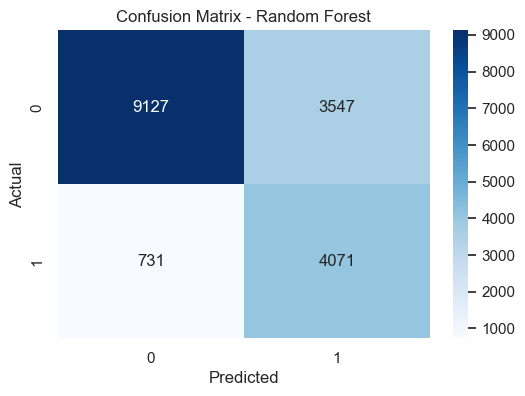

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

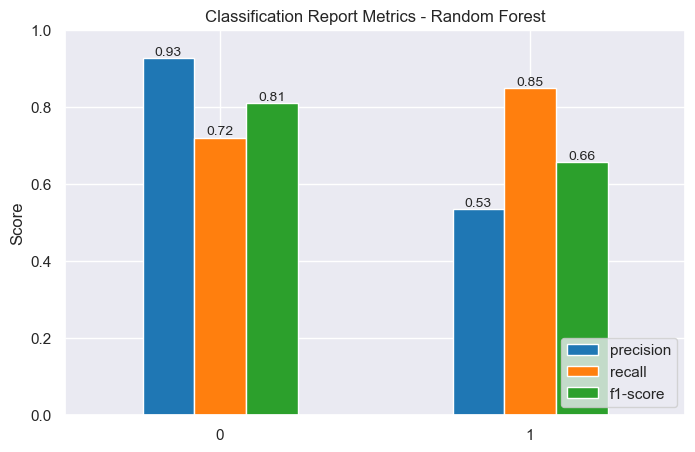

In [203]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Generate classification report as dict
report = classification_report(y_test, y_pred_rf, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Lấy precision – recall – f1 cho class 0 và class 1
df_plot = df_report.iloc[:2, :3]

# Plot
ax = df_plot.plot(kind='bar', figsize=(8,5))
plt.title("Classification Report Metrics - Random Forest")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')

# ===== ADD DATA LABELS =====
for p in ax.patches:
    value = p.get_height()
    ax.annotate(
        f"{value:.2f}",
        (p.get_x() + p.get_width() / 2, value),
        ha='center', va='bottom',
        fontsize=10
    )

plt.show()


## XGBoost Model

In [205]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

xgb = XGBClassifier(
    n_estimators=500,
    max_depth=10,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1],  # xử lý imbalance
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


[[10446  2228]
 [  916  3886]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.87     12674
           1       0.64      0.81      0.71      4802

    accuracy                           0.82     17476
   macro avg       0.78      0.82      0.79     17476
weighted avg       0.84      0.82      0.83     17476



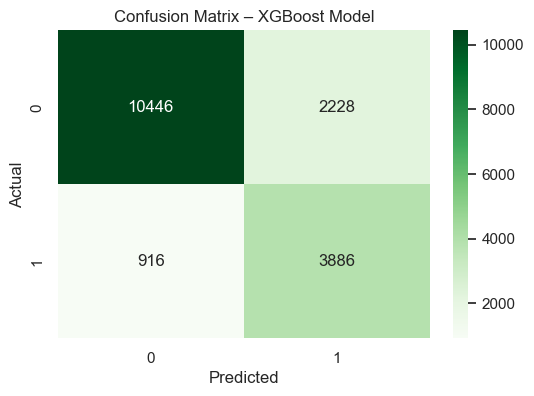

In [207]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6,4))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – XGBoost Model")
plt.show()


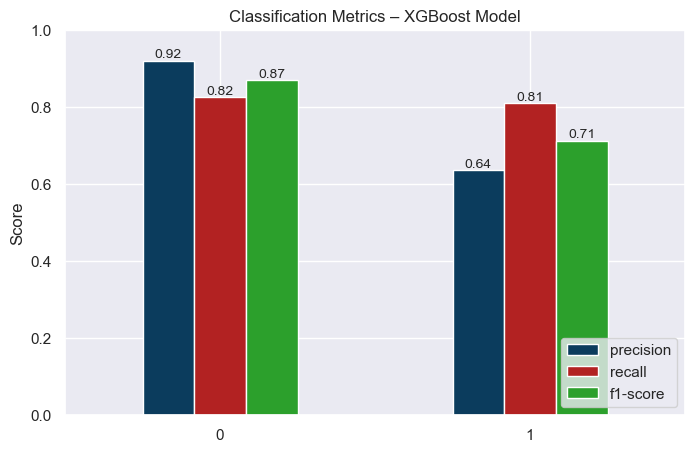

In [266]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Convert classification report → DataFrame
report = classification_report(y_test, y_pred_xgb, output_dict=True)
df_report = pd.DataFrame(report).transpose()
    
# Chỉ lấy precision – recall – f1-score cho class 0 & 1
df_plot = df_report.iloc[:2, :3]

ax = df_plot.plot(kind='bar', figsize=(8,5), color=["#0B3C5D", "#B22222", "#2ca02c"])
plt.title("Classification Metrics – XGBoost Model")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')

# === ADD DATA LABELS ===
for p in ax.patches:
    value = p.get_height()
    ax.annotate(
        f"{value:.2f}",
        (p.get_x() + p.get_width() / 2, value),
        ha='center', va='bottom',
        fontsize=10
    )

plt.show()

## Data Scaling before Logistic Regression

In [211]:
X_train

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,agent_No Agent,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
59605,163,2016,30,22,0,2,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
70801,165,2016,28,3,4,10,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
114534,12,2016,32,31,1,0,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
112526,8,2016,44,29,2,1,2,2.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
74282,1,2017,9,2,0,3,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93662,170,2017,31,5,0,1,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
78641,7,2015,41,5,1,1,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
58451,372,2016,53,28,0,3,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
111628,111,2017,15,13,0,3,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [213]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_num = scaler.fit_transform(X_train[numeric_cols])
X_test_num = scaler.transform(X_test[numeric_cols])

X_train_num = pd.DataFrame(X_train_num, columns=numeric_cols, index=X_train.index)
X_test_num = pd.DataFrame(X_test_num, columns=numeric_cols, index=X_test.index)


In [215]:
X_train = X_train.drop(columns=numeric_cols)
X_test = X_test.drop(columns=numeric_cols)

In [217]:
X_train_final = pd.concat([X_train_num, X_train], axis=1)
X_test_final = pd.concat([X_test_num, X_test], axis=1)

In [219]:
X_test_final['lead_time']

26633    -0.522953
76823    -0.929609
44319     0.964245
28158    -0.673997
215       1.777556
            ...   
57799    -0.801803
100071    0.023127
108071   -0.290579
11369    -0.209247
113641    0.662158
Name: lead_time, Length: 17476, dtype: float64

In [221]:
X_test_final.info(5)

<class 'pandas.core.frame.DataFrame'>
Index: 17476 entries, 26633 to 113641
Data columns (total 231 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    lead_time                       float64
 1    arrival_date_year               float64
 2    arrival_date_week_number        float64
 3    arrival_date_day_of_month       float64
 4    stays_in_weekend_nights         float64
 5    stays_in_week_nights            float64
 6    adults                          float64
 7    children                        float64
 8    babies                          float64
 9    is_repeated_guest               float64
 10   adr                             float64
 11   required_car_parking_spaces     float64
 12   total_of_special_requests       float64
 13   hotel_Resort Hotel              float64
 14   arrival_date_month_August       float64
 15   arrival_date_month_December     float64
 16   arrival_date_month_February     float64
 17   arrival_da

## Logistic Regression Model

In [225]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    class_weight="balanced",
    max_iter=500,
    n_jobs=-1
)

lr.fit(X_train_final, y_train)

y_pred_lr = lr.predict(X_test_final)

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


[[9229 3445]
 [1140 3662]]
              precision    recall  f1-score   support

           0       0.89      0.73      0.80     12674
           1       0.52      0.76      0.61      4802

    accuracy                           0.74     17476
   macro avg       0.70      0.75      0.71     17476
weighted avg       0.79      0.74      0.75     17476



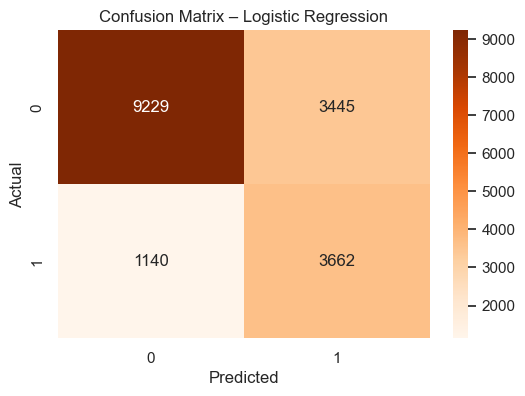

In [233]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()


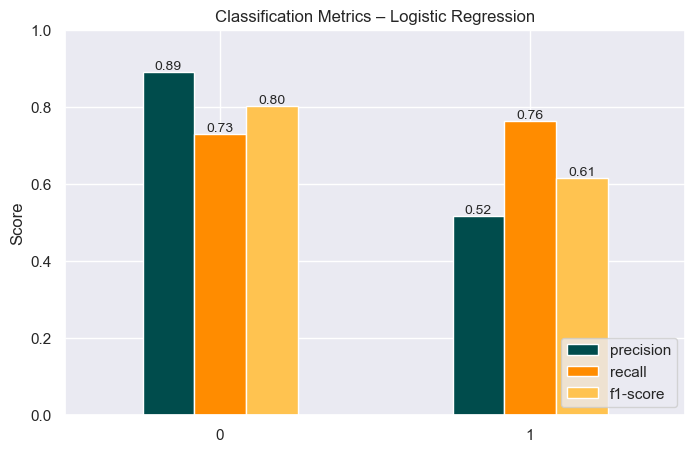

In [280]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Convert classification report → DataFrame
report = classification_report(y_test, y_pred_lr, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Only take precision, recall, f1-score for class 0 and 1
df_plot = df_report.iloc[:2, :3]

ax = df_plot.plot(kind='bar', figsize=(8,5), color=["#004C4C", "#FF8C00", "#FFC350"])
plt.title("Classification Metrics – Logistic Regression")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')

# ===== ADD DATA LABELS =====
for p in ax.patches:
    value = p.get_height()
    ax.annotate(
        f"{value:.2f}",
        (p.get_x() + p.get_width() / 2, value),
        ha='center', va='bottom',
        fontsize=10
    )

plt.show()


# Summary Output

In [237]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model_name, y_true, y_pred):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred)
    }
import pandas as pd

results = []

results.append(evaluate_model("Random Forest", y_test, y_pred_rf))
results.append(evaluate_model("XGBoost", y_test, y_pred_xgb))
results.append(evaluate_model("Logistic Regression", y_test, y_pred_lr))

results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1
0,Random Forest,0.755207,0.534392,0.847772,0.655556
1,XGBoost,0.820096,0.635590,0.809246,0.711982
2,Logistic Regression,0.737640,0.515267,0.762599,0.614997


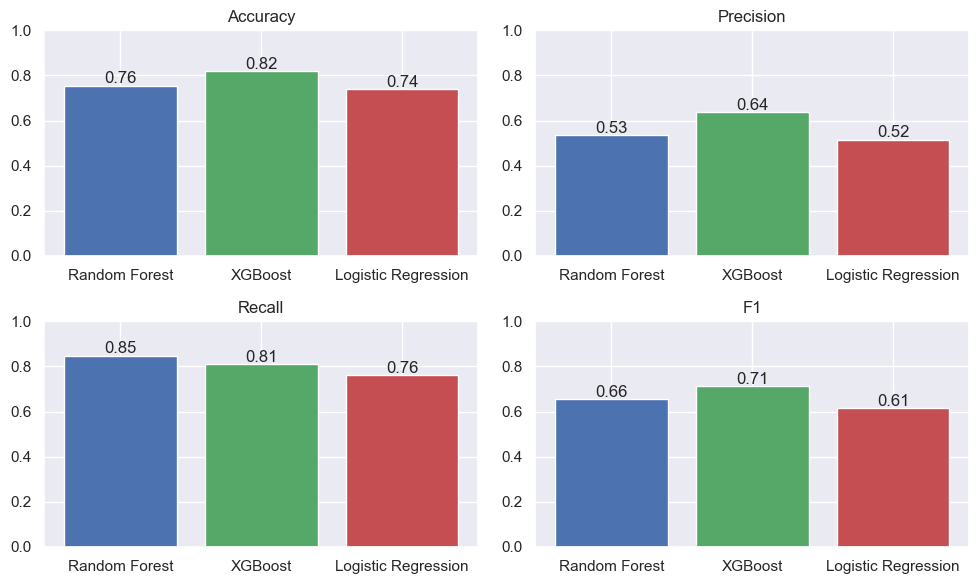

In [241]:
metrics = ["Accuracy", "Precision", "Recall", "F1"]
colors = ["#4C72B0", "#55A868", "#C44E52"]   # màu đẹp: RF – blue, XGB – green, LR – red

plt.figure(figsize=(10,6))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    plt.bar(results_df["Model"], results_df[metric], color=colors)
    plt.title(metric)
    plt.ylim(0, 1)

    # Add data labels
    for j, value in enumerate(results_df[metric]):
        plt.text(j, value + 0.01, f"{value:.2f}", ha='center')

plt.tight_layout()
plt.show()

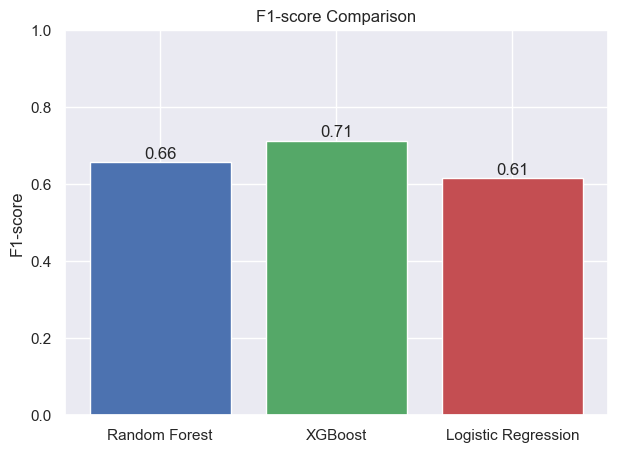

In [239]:
plt.figure(figsize=(7,5))
bars = plt.bar(results_df["Model"], results_df["F1"], color=["#4C72B0", "#55A868", "#C44E52"])
plt.title("F1-score Comparison")
plt.ylabel("F1-score")
plt.ylim(0, 1)

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}", ha='center')

plt.show()


# **Deep Learning: MLP with Classification**

In [415]:
#pip install tensorflow

In [243]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

input_dim = X_train_final.shape[1]

model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(32, activation='relu'),

    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          29,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,065 (156.50 KB)

 Trainable params: 40,065 (156.50 KB)

 Non-trainable params: 0 (0.00 B)

In [244]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_dl_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

callbacks_list = [early_stopping, model_checkpoint]

history = model.fit(
    X_train_final, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=callbacks_list
)

Epoch 1/100
1703/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7717 - loss: 0.4680
Epoch 1: val_loss improved from None to 0.40467, saving model to best_dl_model.h5


1748/1748 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7920 - loss: 0.4326 - val_accuracy: 0.8036 - val_loss: 0.4047
Epoch 2/100
1703/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8116 - loss: 0.3990
Epoch 2: val_loss improved from 0.40467 to 0.39346, saving model to best_dl_model.h5


1748/1748 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8120 - loss: 0.3965 - val_accuracy: 0.8102 - val_loss: 0.3935
Epoch 3/100
1739/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8175 - loss: 0.3834
Epoch 3: val_loss improved from 0.39346 to 0.38687, saving model to best_dl_model.h5


1748/1748 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8158 - loss: 0.3845 - val_accuracy: 0.8126 - val_loss: 0.3869
Epoch 4/100
1729/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8211 - loss: 0.3783
Epoch 4: val_loss improved from 0.38687 to 0.38474, saving model to best_dl_model.h5


1748/1748 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8231 - loss: 0.3749 - val_accuracy: 0.8181 - val_loss: 0.3847
Epoch 5/100
1742/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8236 - loss: 0.3702
Epoch 5: val_loss improved from 0.38474 to 0.38032, saving model to best_dl_model.h5


1748/1748 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8261 - loss: 0.3678 - val_accuracy: 0.8188 - val_loss: 0.3803
Epoch 6/100
1741/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8284 - loss: 0.3656
Epoch 6: val_loss improved from 0.38032 to 0.37582, saving model to best_dl_model.h5


1748/1748 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8289 - loss: 0.3635 - val_accuracy: 0.8210 - val_loss: 0.3758
Epoch 7/100
1724/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8339 - loss: 0.3585
Epoch 7: val_loss did not improve from 0.37582
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8321 - loss: 0.3597 - val_accuracy: 0.8193 - val_loss: 0.3770
Epoch 8/100
1726/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8336 - loss: 0.3518
Epoch 8: val_loss did not improve from 0.37582
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8334 - loss: 0.3546 - val_accuracy: 0.8219 - val_loss: 0.3770
Epoch 9/100
1712/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8372 - loss: 0.3512
Epoch 9: val_loss improved from 0.37582 to 0.37379, saving model to best_dl_model.h5


1748/1748 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8349 - loss: 0.3531 - val_accuracy: 0.8229 - val_loss: 0.3738
Epoch 10/100
1743/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8381 - loss: 0.3499
Epoch 10: val_loss improved from 0.37379 to 0.37309, saving model to best_dl_model.h5


1748/1748 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8362 - loss: 0.3512 - val_accuracy: 0.8233 - val_loss: 0.3731
Epoch 11/100
1709/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8419 - loss: 0.3433
Epoch 11: val_loss did not improve from 0.37309
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8389 - loss: 0.3473 - val_accuracy: 0.8212 - val_loss: 0.3788
Epoch 12/100
1720/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8432 - loss: 0.3415
Epoch 12: val_loss did not improve from 0.37309
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8405 - loss: 0.3443 - val_accuracy: 0.8210 - val_loss: 0.3771
Epoch 13/100
1727/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8410 - loss: 0.3413
Epoch 13: val_loss improved from 0.37309 to 0.37246, saving model to best_dl_model.h5


1748/1748 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8417 - loss: 0.3416 - val_accuracy: 0.8255 - val_loss: 0.3725
Epoch 14/100
1734/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8472 - loss: 0.3361
Epoch 14: val_loss did not improve from 0.37246
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8443 - loss: 0.3390 - val_accuracy: 0.8228 - val_loss: 0.3779
Epoch 15/100
1724/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8454 - loss: 0.3351
Epoch 15: val_loss did not improve from 0.37246
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8448 - loss: 0.3374 - val_accuracy: 0.8236 - val_loss: 0.3748
Epoch 16/100
1707/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8483 - loss: 0.3312
Epoch 16: val_loss did not improve from 0.37246
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8446 - loss: 0.3360 - val_accuracy: 0.8240 - val_loss: 0.3750
Epoch 17/100
1717/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8515 - loss: 0.3250
Epoch 17: val_loss d

In [245]:
loss, accuracy = model.evaluate(X_test_final, y_test)
print("Test accuracy:", accuracy)

547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step - accuracy: 0.8277 - loss: 0.3626
Test accuracy: 0.8277065753936768


In [246]:
from sklearn.metrics import classification_report

y_pred = (model.predict(X_test_final) > 0.5).astype(int)

print(classification_report(y_test, y_pred))


547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     12674
           1       0.71      0.64      0.67      4802

    accuracy                           0.83     17476
   macro avg       0.79      0.77      0.78     17476
weighted avg       0.82      0.83      0.82     17476



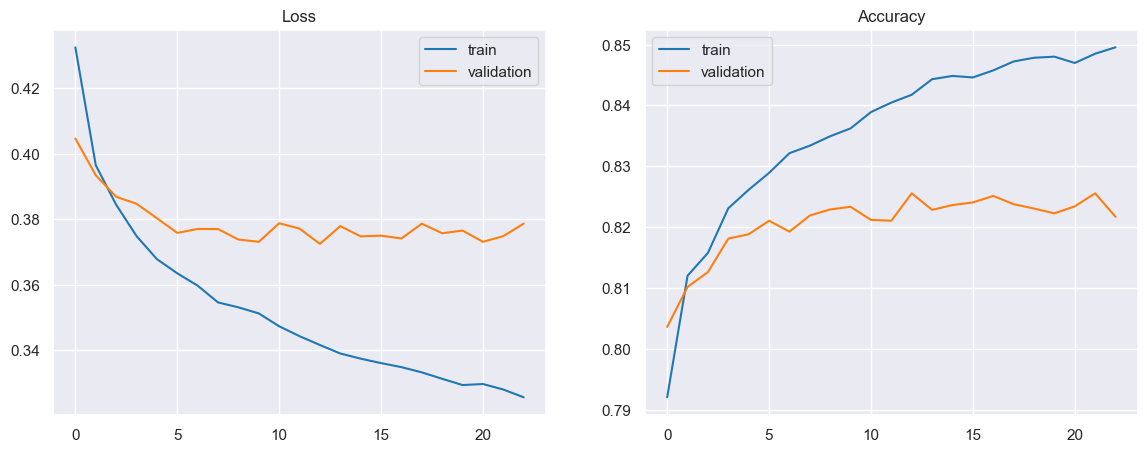

In [247]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'validation'])

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'validation'])

plt.show()


Insights:
- The model achieved a solid Test Accuracy of approximately 83%. However, the training history shows a slight overfitting trend. The Validation Loss (around 0.35) plateaued while the Train Loss continued to drop, indicating the model was starting to memorize training data. Early Stopping successfully mitigated severe overfitting.

- The most critical issue is the severe bias towards the majority class (Class 0). While Class 0 achieved a strong Recall of 0.90, the minority class (Class 1) performed poorly with a low Recall of only 0.65. This means the model frequently fails to identify true instances of the minority class.